# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Machine Learning with Tree-Based Models in  Python</h1>

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions.

In this course, you'll learn how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. You'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets. Finally, you'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Classification and Regression Trees](#1)
    - Decision tree for classification
    - Classification tree learning
    - Decision tree for regression

* [2. The Bias-Variance Tradeoff](#2) 
    - Generalization error
    - Diagnose bias and variance problems
    - Ensemble learning
    
* [3. Bagging and Random Forests](#3)
    - Bagging
    - Out of bag evaluation
    - Random Forests (RF)
    
* [4. Boosting](#4)
    - Adaboost
    - Gradient Boosting (GB)
    - Stochastic Gradient Boosting (SGB)

* [5. Model Tuning](#4)
    - Tuning a CART's Hyperparameters
    - Tuning a RF's Hyperparameters
    - Congratulations

In [103]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the course datasets 
bike = pd.read_csv('datasets/bikes.csv')
liver_patient = pd.read_csv('datasets/indian_liver_patient.csv')
liver_preprocessed = pd.read_csv('datasets/indian_liver_patient_preprocessed.csv')
breast = pd.read_csv('datasets/wbc.csv')
auto = pd.read_csv("datasets/auto.csv")

In [ ]:
bike

In [105]:
liver_patient

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

In [106]:
liver_preprocessed

Unnamed: 0   Age_std  Total_Bilirubin_std  Direct_Bilirubin_std  \
0             0  1.247403            -0.420320             -0.495414   
1             1  1.062306             1.218936              1.423518   
2             2  1.062306             0.640375              0.926017   
3             3  0.815511            -0.372106             -0.388807   
4             4  1.679294             0.093956              0.179766   
..          ...       ...                  ...                   ...   
574         578  0.938909            -0.452462             -0.495414   
575         579 -0.295067            -0.436391             -0.495414   
576         580  0.445318            -0.404249             -0.459878   
577         581 -0.850356            -0.323893             -0.353271   
578         582 -0.418465            -0.372106             -0.424343   

     Alkaline_Phosphotase_std  Alamine_Aminotransferase_std  \
0                   -0.428870                     -0.355832   
1                    1.675083                     -0.093573   
2                    0.816243                     -0.115428   
3                   -0.449416                     -0.366760   
4                   -0.395996                     -0.295731   
..                        ...                           ...   
574                  0.857336                     -0.333977   
575                 -0.794596                     -0.252021   
576                 -0.190532                     -0.180993   
577                 -0.441198                     -0.284804   
578                 -0.309701                     -0.328514   

     Aspartate_Aminotransferase_std  Total_Protiens_std  Albumin_std  \
0                         -0.319111            0.293722     0.203446   
1                         -0.035962            0.939655     0.077462   
2                         -0.146459            0.478274     0.203446   
3                         -0.312205            0.293722     0.329431   
4                         -0.177537            0.755102    -0.930414   
..                              ...                 ...          ...   
574                       -0.263863           -0.536763    -1.938290   
575                       -0.274222           -0.444487     0.077462   
576                       -0.212067           -0.075383     0.077462   
577                       -0.270769            0.293722     0.329431   
578                       -0.298393            0.755102     1.589276   

     Albumin_and_Globulin_Ratio_std  Is_male_std  Liver_disease  
0                         -0.147390            0              1  
1                         -0.648461            1              1  
2                         -0.178707            1              1  
3                          0.165780            1              1  
4                         -1.713237            1              1  
..                              ...          ...            ...  
574                       -1.807188            1              0  
575                        0.478949            1              1  
576                        0.165780            1              1  
577                        0.165780            1              1  
578                        1.731627            1              0  

[579 rows x 12 columns]

In [107]:
breast

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [108]:
auto

mpg  displ   hp  weight  accel  origin  size
0    18.0  250.0   88    3139   14.5      US  15.0
1     9.0  304.0  193    4732   18.5      US  20.0
2    36.1   91.0   60    1800   16.4    Asia  10.0
3    18.5  250.0   98    3525   19.0      US  15.0
4    34.3   97.0   78    2188   15.8  Europe  10.0
..    ...    ...  ...     ...    ...     ...   ...
387  18.0  250.0   88    3021   16.5      US  15.0
388  27.0  151.0   90    2950   17.3      US  10.0
389  29.5   98.0   68    2135   16.6    Asia  10.0
390  17.5  250.0  110    3520   16.4      US  15.0
391  25.1  140.0   88    2720   15.4      US  10.0

[392 rows x 7 columns]

## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Classification and Regression Trees</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

## Decision-Tree for Classification

1. Decision-Tree for Classification

Hi! My name is Elie Kawerk, I'm a Data Scientist and I'll be your instructor. In this course, you'll be learning about tree-based models for classification and regression.

2. Course Overview

In chapter 1, you'll be introduced to a set of supervised learning models known as Classification-And-Regression-Tree or CART. In chapter 2, you'll understand the notions of bias-variance trade-off and model ensembling. Chapter 3 introduces you to Bagging and Random Forests. Chapter 4 deals with boosting, specifically with AdaBoost and Gradient Boosting. Finally in chapter 5, you'll understand how to get the most out of your models through hyperparameter-tuning.

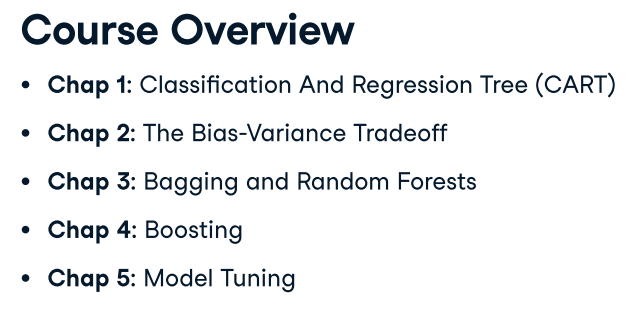

3. Classification-tree

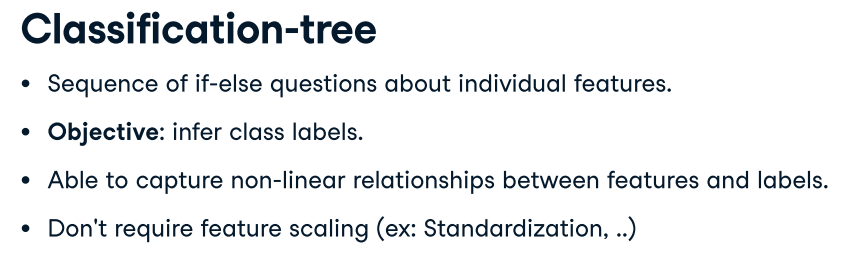

Given a labeled dataset, a classification tree learns a sequence of if-else questions about individual features in order to infer the labels. In contrast to linear models, trees are able to capture non-linear relationships between features and labels. In addition, trees don't require the features to be on the same scale through standardization for example.

4. Breast Cancer Dataset in 2D

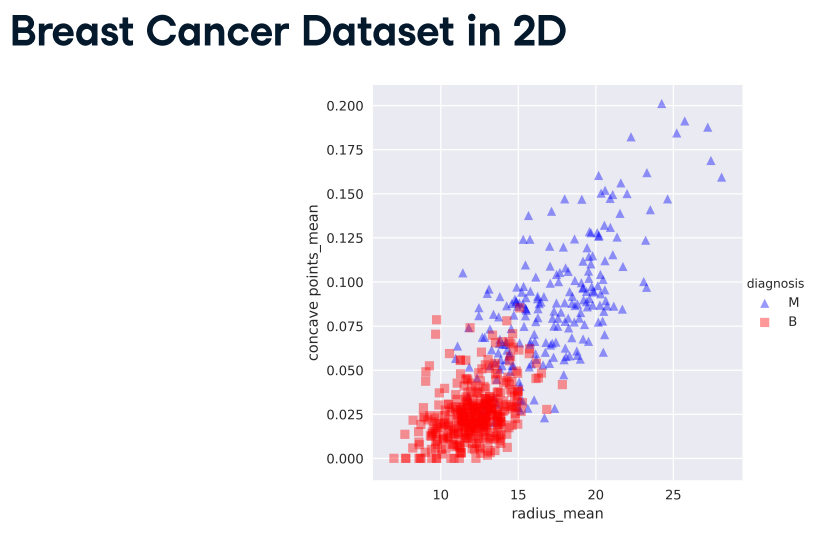

To understand trees more concretely, we'll try to predict whether a tumor is malignant or benign in the Wisconsin Breast Cancer dataset using only 2 features. The figure here shows a scatterplot of two cancerous cell features with malignant-tumors in blue and benign-tumors in red.

5. Decision-tree Diagram

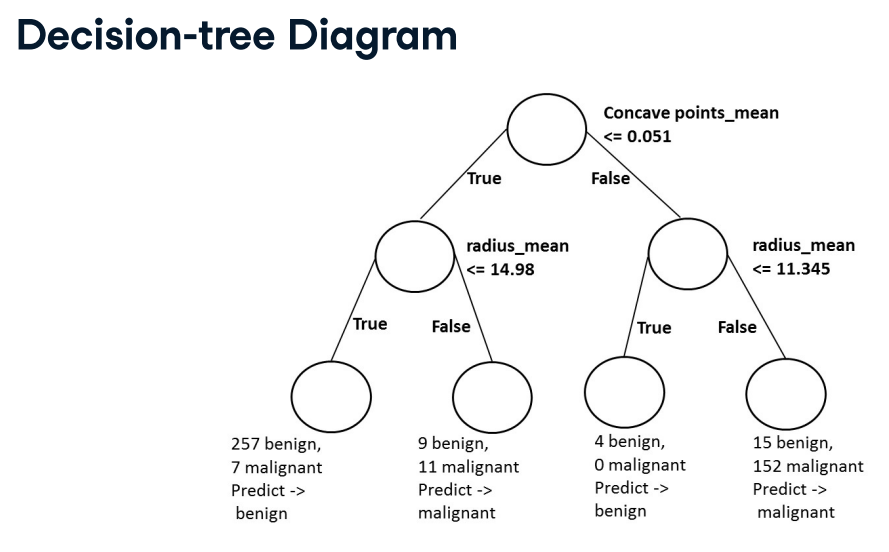

When a classification tree is trained on this dataset, the tree learns a sequence of if-else questions with each question involving one feature and one split-point. Take a look at the tree diagram here. At the top, the tree asks whether the concave-points mean of an instance is <= 0-point-051. If it is, the instance traverses the True branch; otherwise, it traverses the False branch. Similarly, the instance keeps traversing the internal branches until it reaches an end. The label of the instance is then predicted to be that of the prevailing class at that end. The maximum number of branches separating the top from an extreme-end is known as the maximum depth which is equal to 2 here.

6. Classification-tree in scikit-learn

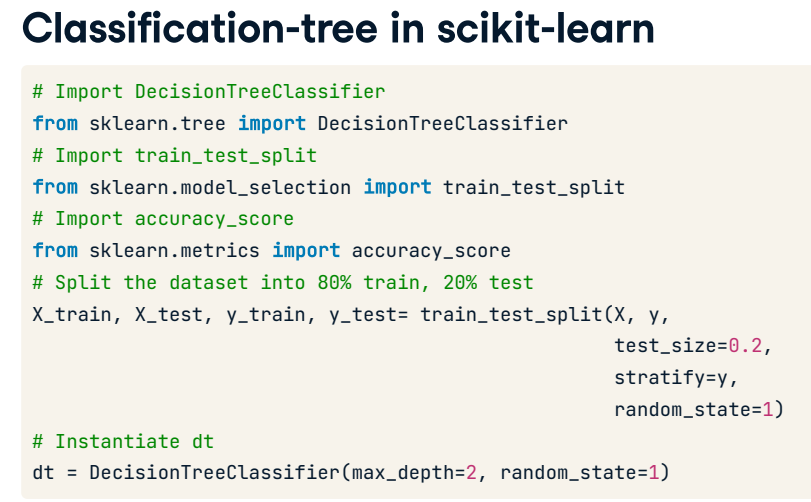

Now that you know what a classification tree is, let's fit one with scikit-learn. First, import DecisionTreeClassifier from sklearn.tree as shown in line 1. Also, import the functions train_test_split() from sklearn.model_selection and accuracy_score() from sklearn.metrics. In order to obtain an unbiased estimate of a model's performance, you must evaluate it on an unseen test set. To do so, first split the data into 80% train and 20% test using train_test_split(). Set the parameter stratify to y in order for the train and test sets to have the same proportion of class labels as the unsplit dataset. You can now use DecisionTreeClassifier() to instantiate a tree classifier, dt with a maximum depth of 2 by setting the parameter max_depth to 2. Note that the parameter random_state is set to 1 for reproducibility.

7. Classification-tree in scikit-learn

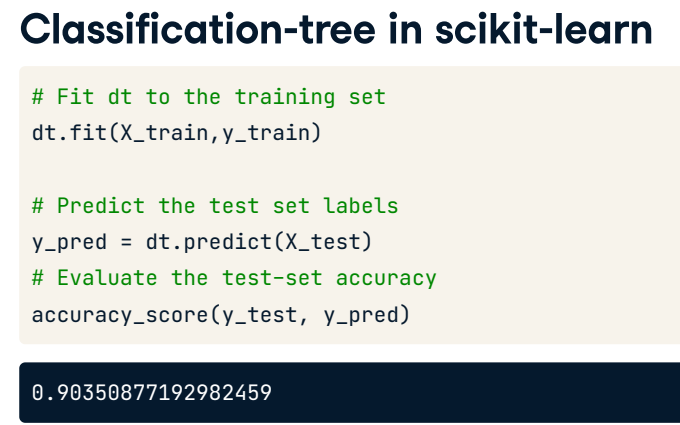

Then call the fit method on dt and pass X_train and y_train. To predict the labels of the test-set, call the predict method on dt. Finally print the accuracy of the test set using accuracy_score(). To understand the tree's predictions more concretely, let's see how it classifies instances in the feature-space.

8. Decision Regions

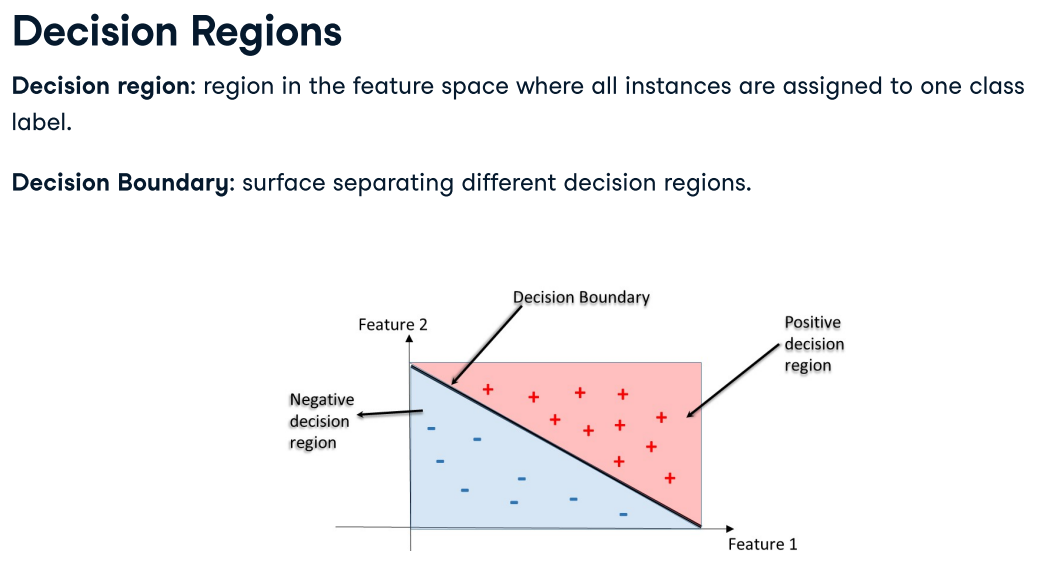

A classification-model divides the feature-space into regions where all instances in one region are assigned to only one class-label. These regions are known as decision-regions. Decision-regions are separated by surfaces called decision-boundaries. The figure here shows the decision-regions of a linear-classifier. Note how the boundary is a straight-line.

9. Decision Regions: CART vs. Linear Model

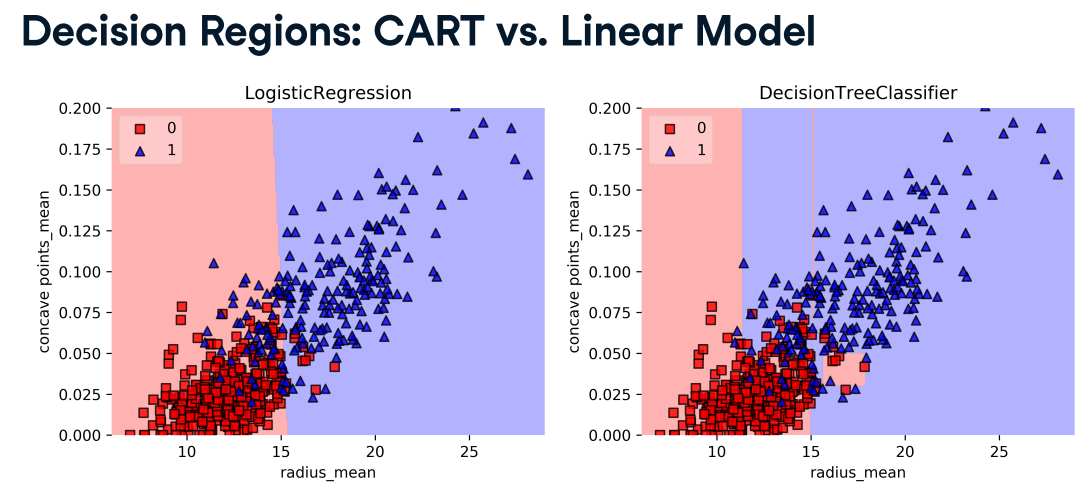

In contrast, as shown here on the right, a classification-tree produces rectangular decision-regions in the feature-space. This happens because at each split made by the tree, only one feature is involved.

10. Let's practice!

Now let's practice!

### Exercise

**Train your first classification tree**

In this exercise you'll work with the [Wisconsin Breast Cancer](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

**Instructions**

- Import DecisionTreeClassifier from sklearn.tree.
- Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.
- Fit dt to the training set.
- Predict the test set labels and assign the result to y_pred.

In [109]:
breast

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [110]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [111]:
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [112]:
breast.drop('Unnamed: 32', axis=1, inplace=True)

In [113]:
# Create breast_dummies
breast_dummies = pd.get_dummies(breast, drop_first=True)

# Print the new DataFrame's shape
print("Shape of breast_dummies: {}".format(breast_dummies.shape))

Shape of breast_dummies: (569, 32)


In [114]:
breast_dummies.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')

In [115]:
breast_dummies.rename(columns={"diagnosis_M": "diagnosis"}, inplace=True)

In [116]:
# Import the module
from sklearn.model_selection import train_test_split

X = breast_dummies.drop("diagnosis", axis=1)
y = breast_dummies["diagnosis"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

SEED=1

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

Awesome! You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

### Exercise

**Evaluate the classification tree**

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

**Instructions**

- Import the function accuracy_score from sklearn.metrics.
- Predict the test set labels and assign the obtained array to y_pred.
- Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Not bad! Using only two features, your tree was able to achieve an accuracy of 89%!

### Exercise

**Logistic regression vs classification tree**

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

**Instructions**

- Import LogisticRegression from sklearn.linear_model.
- Instantiate a LogisticRegression model and assign it to logreg.
- Fit logreg to the training set.
- Review the plot generated by plot_labeled_decision_regions().

In [117]:
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import plot_decision_regions

In [118]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 1)
# X_test2 = pca.fit_transform(X_test)

# pca = PCA(n_components = 1)
# X_train2 = pca.fit_transform(X_train)

In [123]:
def plot_labeled_decision_regions(X_test, y_test, clfs):
    
    for clf in clfs:

        X_test2 = np.array(X_test)
        y_test2 = np.array(y_test)
        mlxtend.plotting.plot_decision_regions(X_test2, y_test2, clf=clf, legend=2)
        
        plt.ylim((0,0.2))

        # Adding axes annotations
#         plt.xlabel(X_test.columns[0])
#         plt.ylabel(X_test.columns[1])
        plt.title(str(clf).split('(')[0])
        plt.show()

ValueError: Filler values must be provided when X has more than 2 training features.

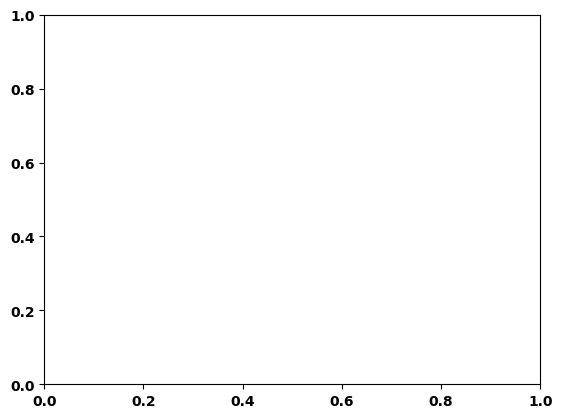

In [125]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

## 1 02 Classification-Tree Learning

1. Classification-Tree Learning

Welcome back! In this video, you'll examine how a classification-tree learns from data.

2. Building Blocks of a Decision-Tree

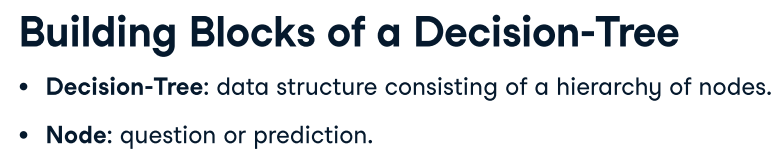

Let's first start by defining some terms. A decision-tree is a data-structure consisting of a hierarchy of individual units called nodes. A node is a point that involves either a question or a prediction.

3. Building Blocks of a Decision-Tree

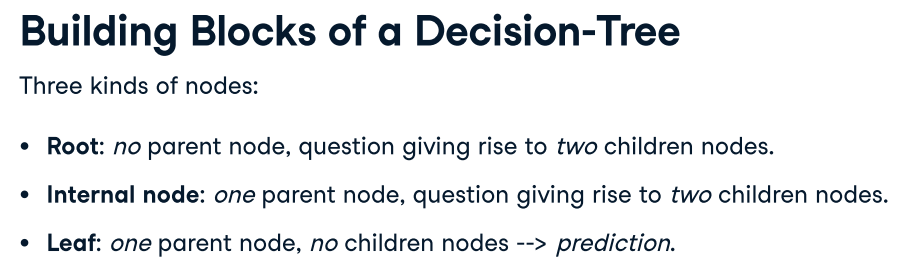

The root is the node at which the decision-tree starts growing. It has no parent node and involves a question that gives rise to 2 children nodes through two branches. An internal node is a node that has a parent. It also involves a question that gives rise to 2 children nodes. Finally, a node that has no children is called a leaf. A leaf has one parent node and involves no questions. It's where a prediction is made. Recall that when a classification tree is trained on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. In other words the tree is trained in such a way so that, in each leaf, one class-label is predominant.

4. Prediction

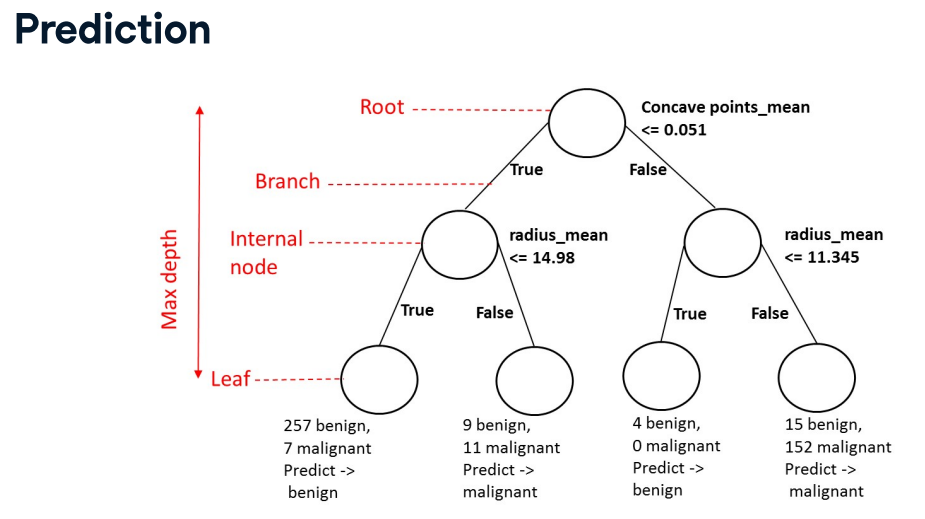

In the tree diagram shown here, consider the case where an instance traverses the tree to reach the leaf on the left. In this leaf, there are 257 instances classified as benign and 7 instances classified as malignant. As a result, the tree's prediction for this instance would be: 'benign'. In order to understand how a classification tree produces the purest leafs possible, let's first define the concept of information gain.

5. Information Gain (IG)

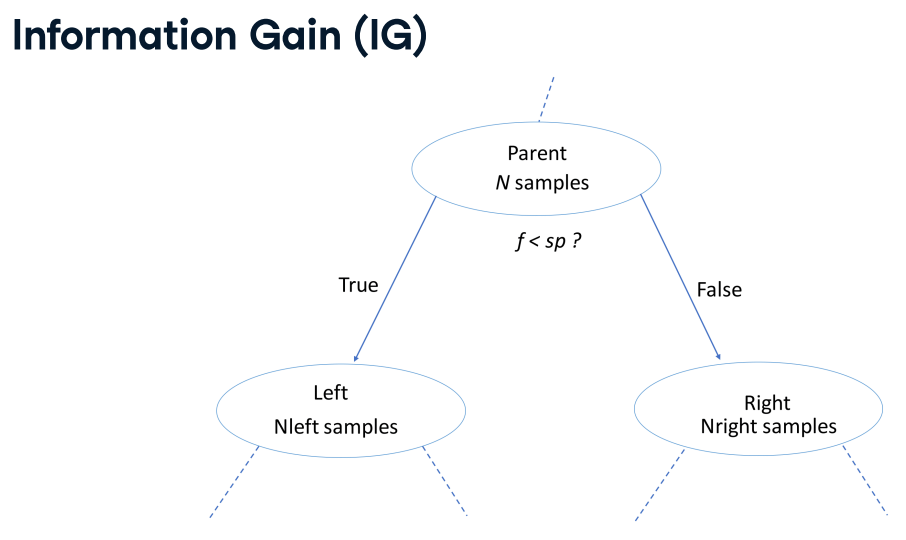

The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors. To produce the purest leafs possible, at each node, a tree asks a question involving one feature f and a split-point sp. But how does it know which feature and which split-point to pick? It does so by maximizing Information gain! The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with Nright samples.

6. Information Gain (IG)

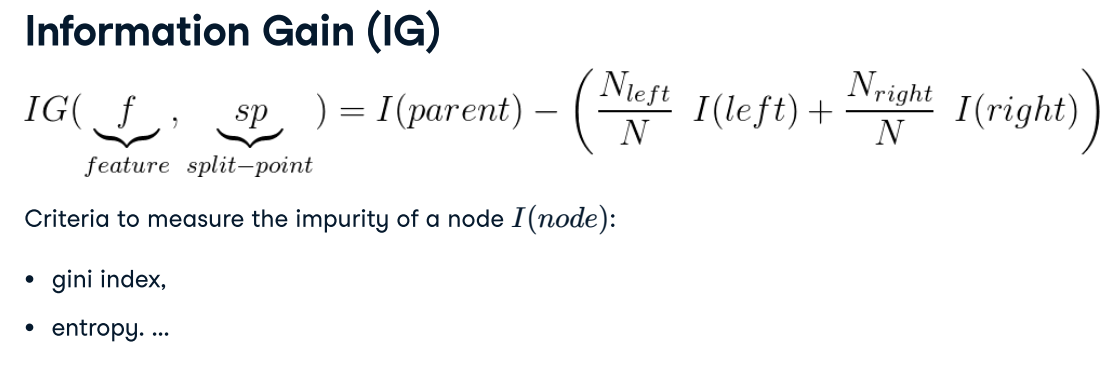

The information gain for such split is given by the formula shown here. A question that you may have in mind here is: 'What criterion is used to measure the impurity of a node?' Well, there are different criteria you can use among which are the gini-index and entropy. Now that you know what is Information gain, let's describe how a classification tree learns.

7. Classification-Tree Learning

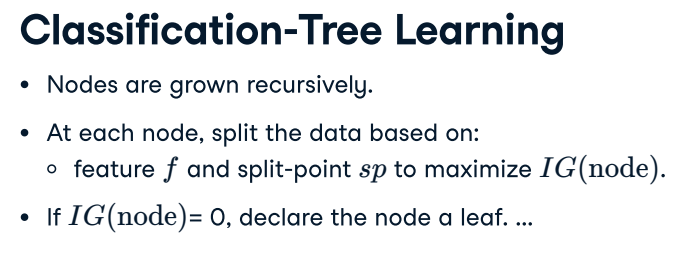

When an unconstrained tree is trained, the nodes are grown recursively. In other words, a node exists based on the state of its predecessors. At a non-leaf node, the data is split based on feature f and split-point sp in such a way to maximize information gain. If the information gain obtained by splitting a node is null, the node is declared a leaf. Keep in mind that these rules are for unconstrained trees. If you constrain the maximum depth of a tree to 2 for example, all nodes having a depth of 2 will be declared leafs even if the information gain obtained by splitting such nodes is not null.

8. Information Criterion in scikit-learn (Breast Cancer dataset)

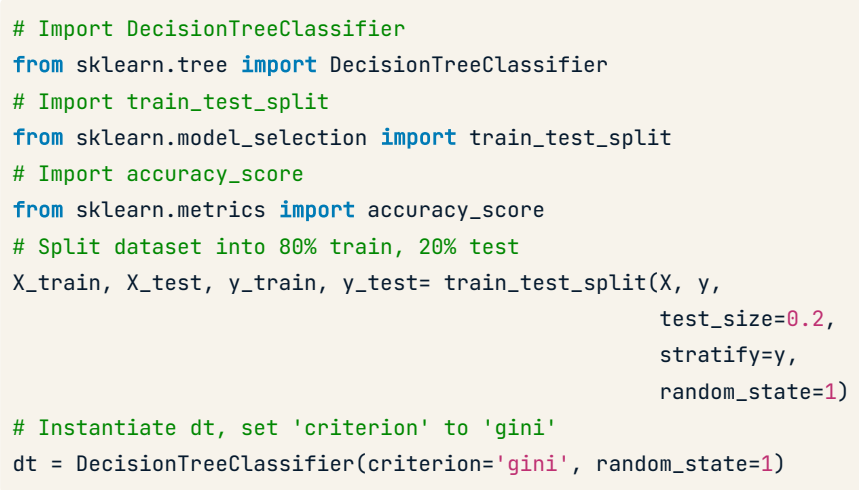

Revisiting the 2D breast-cancer dataset from the previous lesson, you can set the information criterion of dt to the gini-index by setting the criterion parameter to 'gini' as shown on the last line here.

9. Information Criterion in scikit-learn

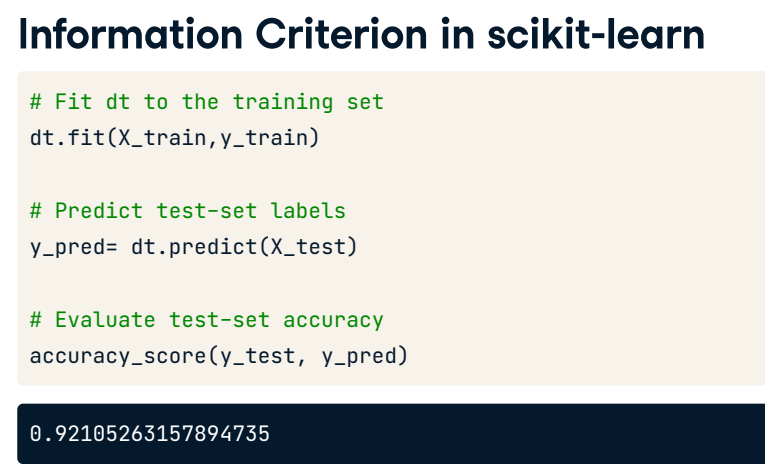

Now fit dt to the training set and predict the test set labels. Then determine dt's test set accuracy which evaluates to about 92%.

10. Let's practice!

Now it's your turn to practice.

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. The Bias-Variance Tradeoff</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, you'll understand how to diagnose the problems of overfitting and underfitting. You'll also be introduced to the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.

## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. Bagging and Random Forests</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

## 3 01 Bagging

1. Bagging

Welcome back! In this video, you'll be introduced to an ensemble method known as Bootstrap aggregation or Bagging.

2. Ensemble Methods

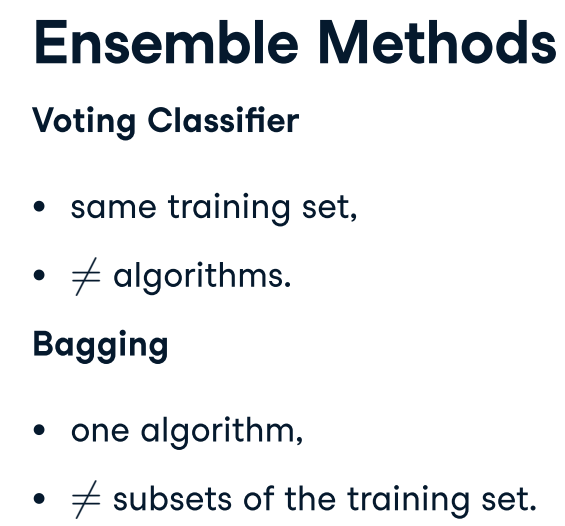

In the last chapter, you learned that the Voting Classifier is an ensemble of models that are fit to the same training set using different algorithms. You also saw that the final predictions were obtained by majority voting. In Bagging, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data.

3. Bagging

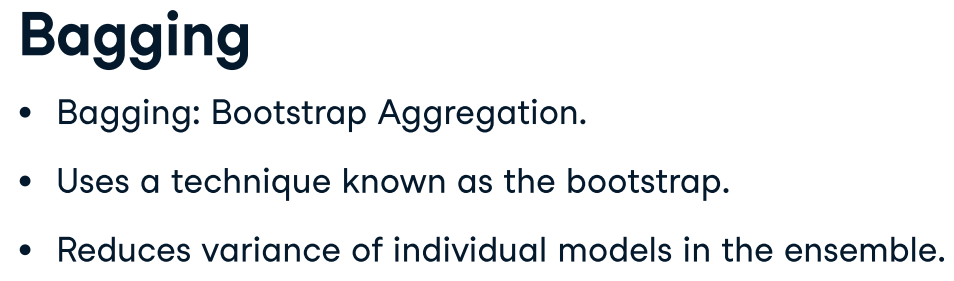

In fact, bagging stands for bootstrap aggregation. Its name refers to the fact that it uses a technique known as the bootstrap. Overall, Bagging has the effect of reducing the variance of individual models in the ensemble.

4. Bootstrap

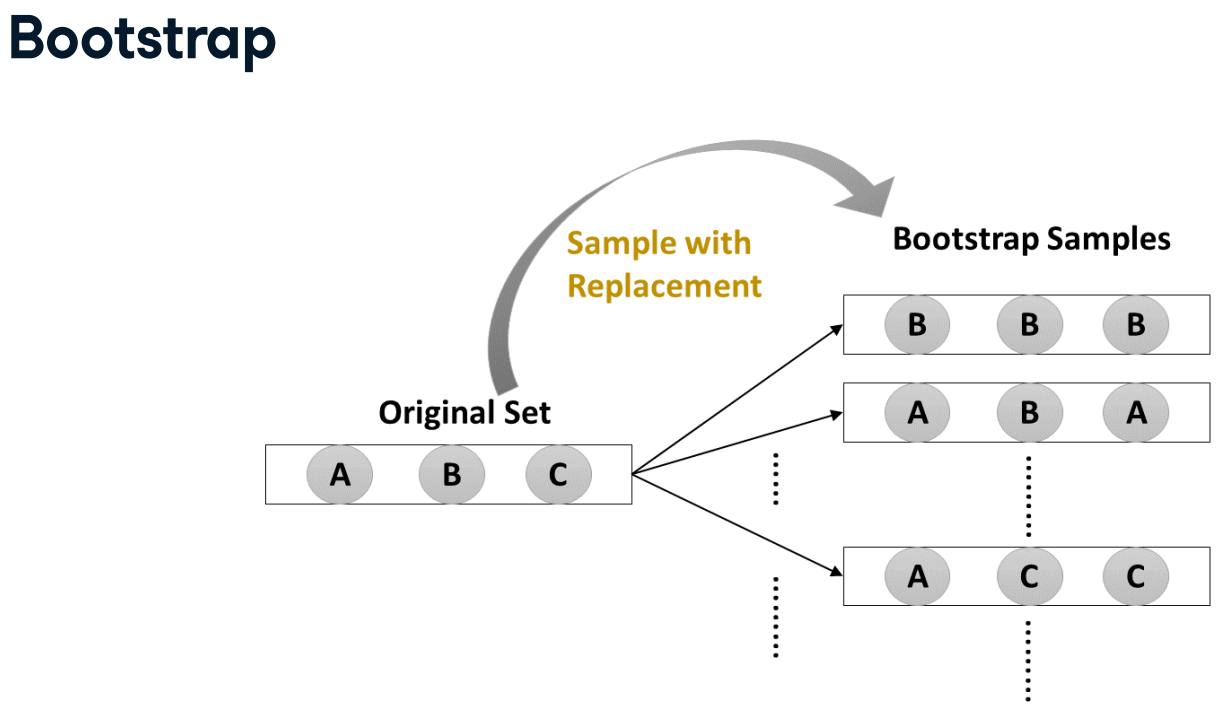

Let's first try to understand what the bootstrap method is. Consider the case where you have 3 balls labeled A, B, and C. A bootstrap sample is a sample drawn from this with replacement. By replacement, we mean that any ball can be drawn many times. For example, in the first bootstrap sample shown in the diagram here, B was drawn 3 times in a raw. In the second bootstrap sample, A was drawn two times while B was drawn once, and so on. You may now ask how bootstraping can help us produce an ensemble.

5. Bagging: Training

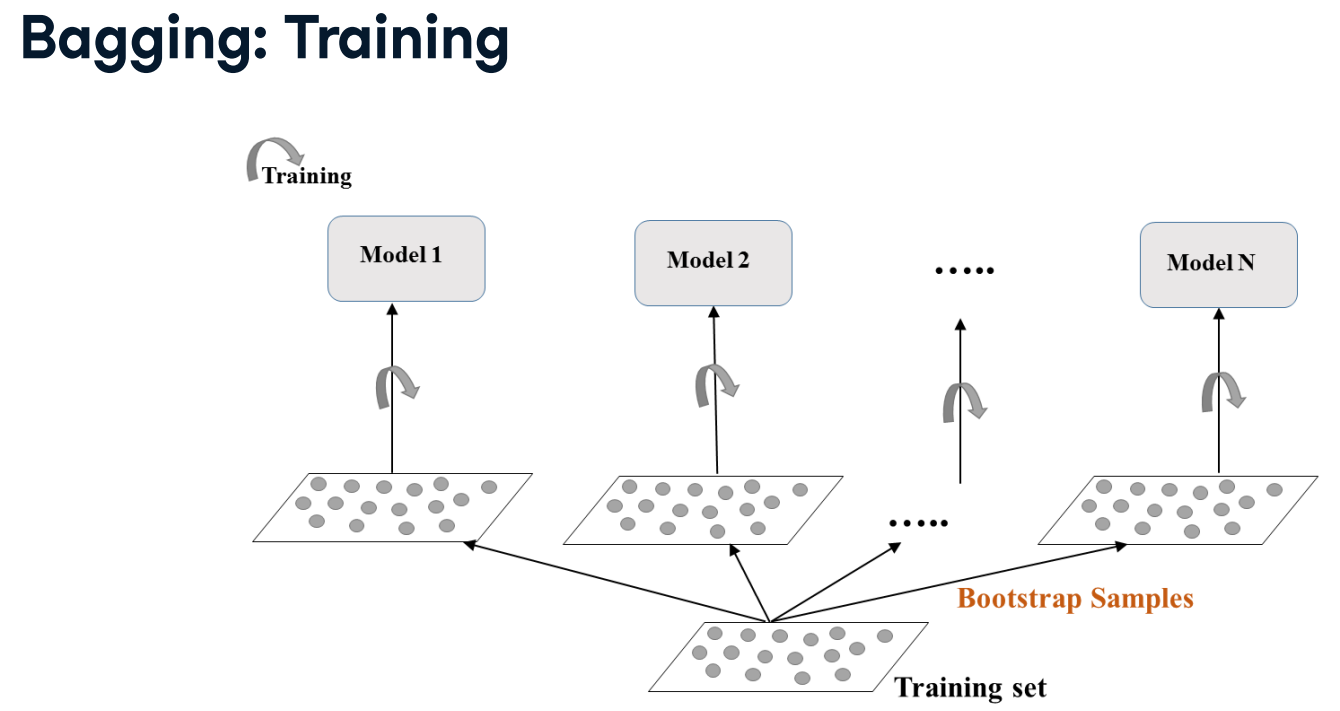

In fact, in the training phase, bagging consists of drawing N different bootstrap samples from the training set. As shown in the diagram here, each of these bootstrap samples are then used to train N models that use the same algorithm .

6. Bagging: Prediction

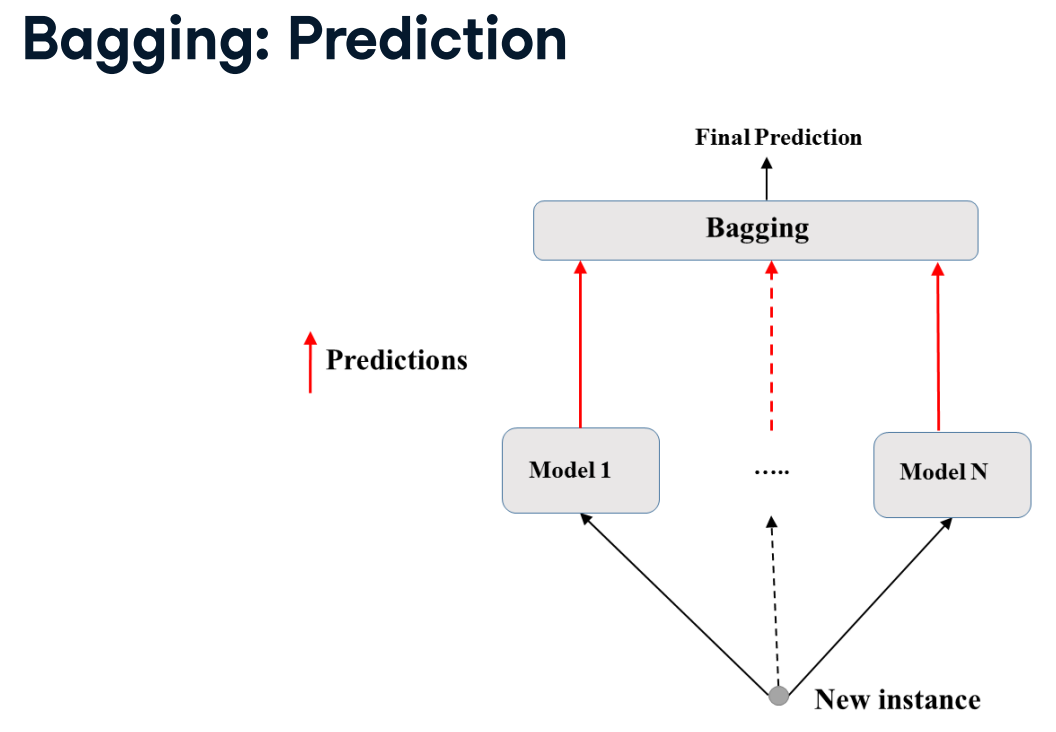

When a new instance is fed to the different models forming the bagging ensemble, each model outputs its prediction. The meta model collects these predictions and outputs a final prediction depending on the nature of the problem.

7. Bagging: Classification & Regression

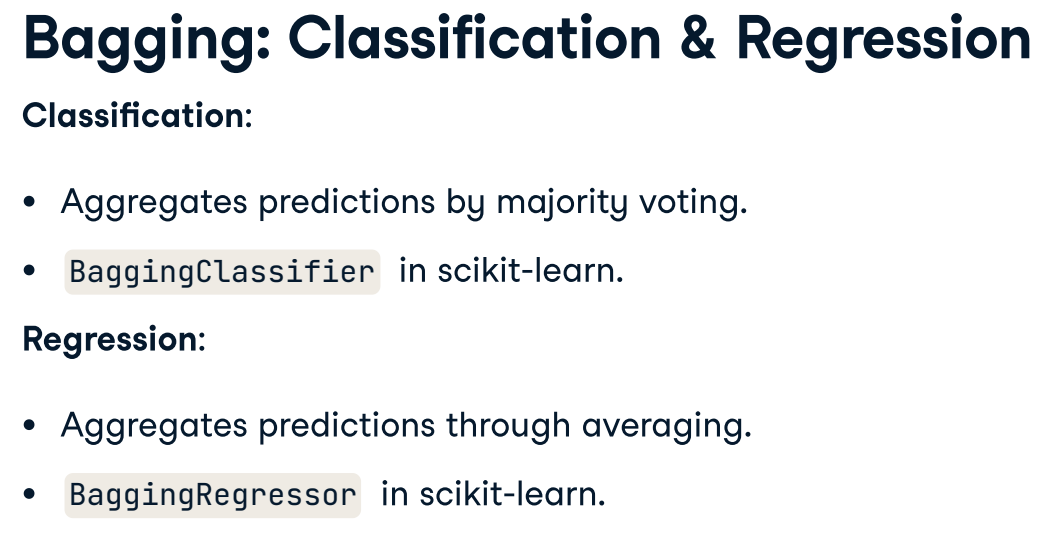

In classification, the final prediction is obtained by majority voting. The corresponding classifier in scikit-learn is BaggingClassifier. In regression, the final prediction is the average of the predictions made by the individual models forming the ensemble. The corresponding regressor in scikit-learn is BaggingRegressor.

8. Bagging Classifier in sklearn (Breast-Cancer dataset)

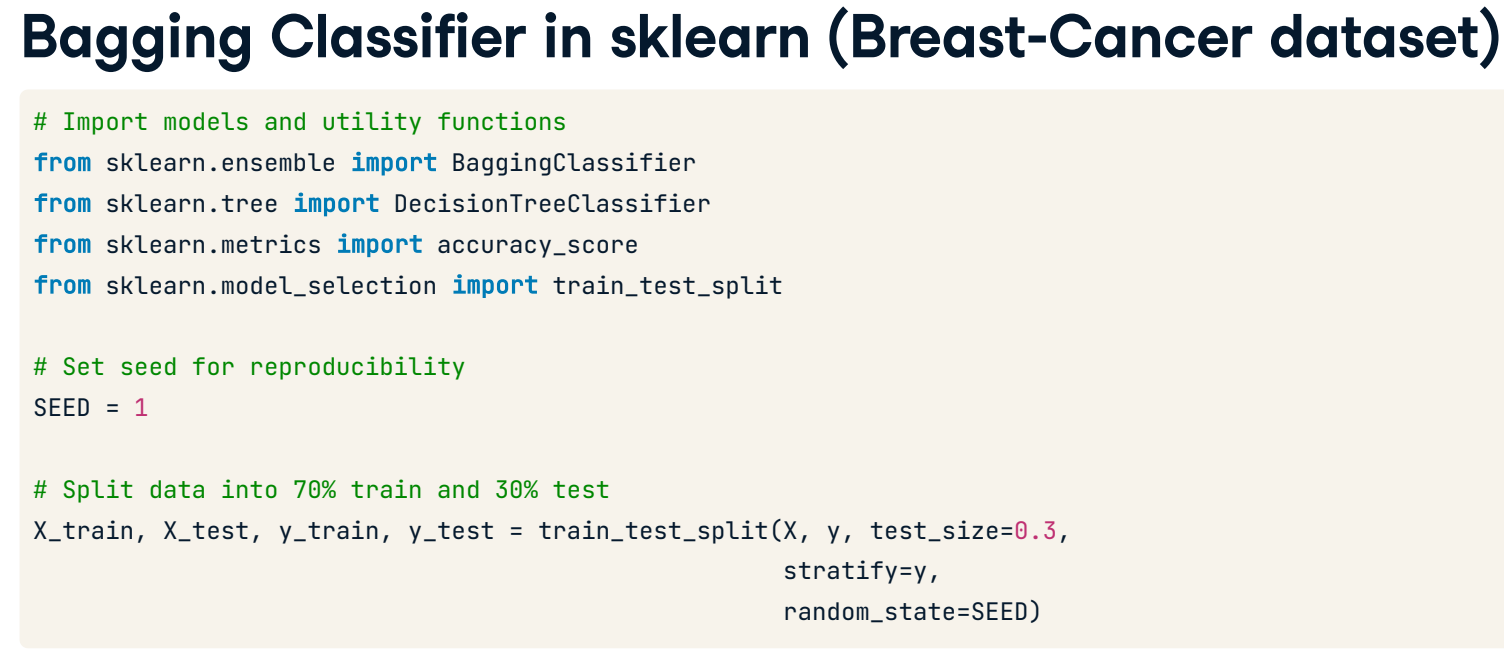

Great! Now that you understand how Bagging works, let's train a BaggingClassifier in scikit-learn on the breast cancer dataset. Note that the dataset is already loaded. First import BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split and then split the data into 70%-train and 30%-test as shown here.

9. Bagging Classifier in sklearn (Breast-Cancer dataset)

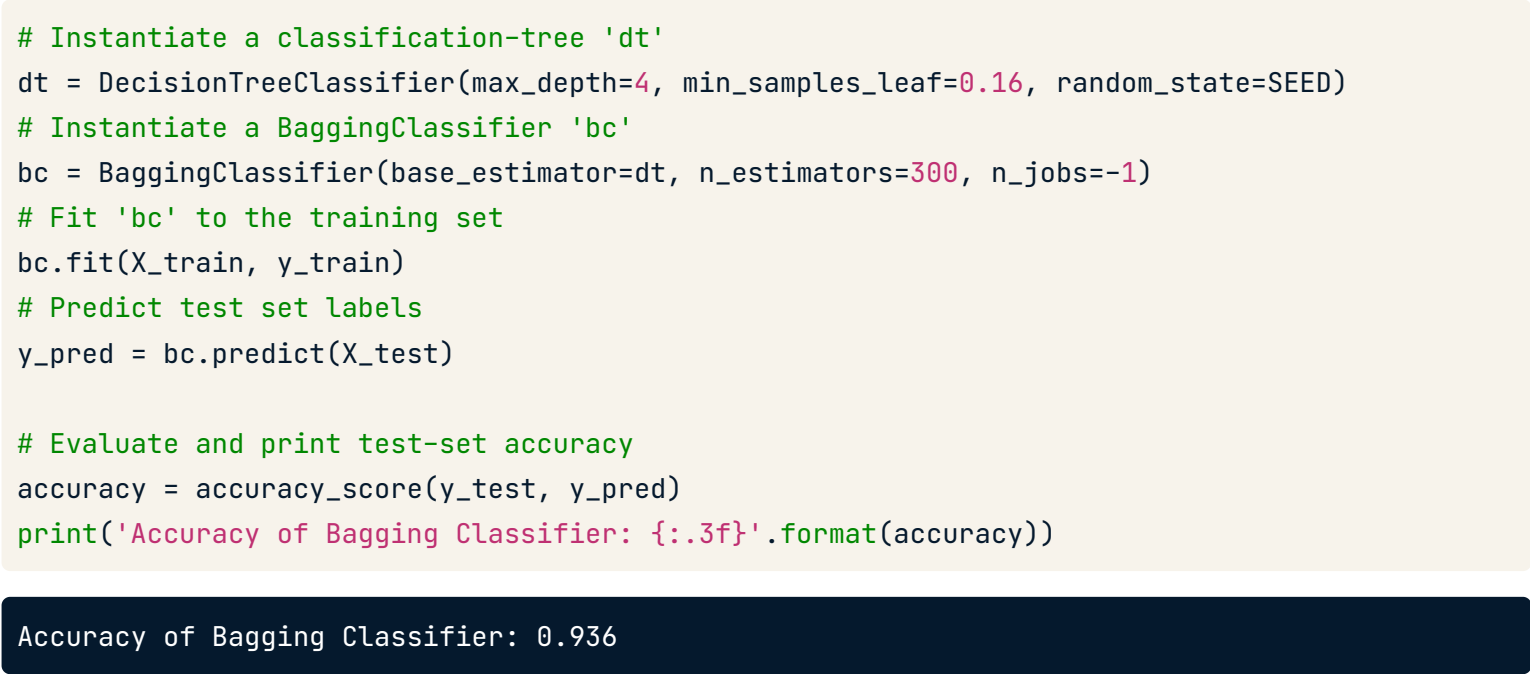

Now, instantiate a classification tree dt with the parameters max_depth set to 4 and min_samples_leaf set to 0-dot-16. You can then instantiate a BaggingClassifier bc that consists of 300 classification trees dt. This can be done by setting the parameters base_estimator to dt and n_estimators to 300. In addition, set the paramter n_jobs to -1 so that all CPU cores are used in computation. Once you are done, fit bc to the training set, predict the test set labels and finally, evaluate the test set accuracy. The output shows that a BaggingClassifier achieves a test set accuracy of 93-dot-6%. Training the classification tree dt, which is the base estimator here, to the same training set would lead to a test set accuracy of 88-dot-9%. The result highlights how bagging outperforms the base estimator dt.

10. Let's practice!

Alright, now it's your time to practice.

### Exercise

**Define the bagging classifier**

In the following exercises you'll work with the [Indian Liver Patient](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records) dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

**Instructions**

- Import DecisionTreeClassifier from sklearn.tree and BaggingClassifier from sklearn.ensemble.
- Instantiate a DecisionTreeClassifier called dt.
- Instantiate a BaggingClassifier called bc consisting of 50 trees.

In [77]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

Great! In the following exercise, you'll train bc and evaluate its test set performance.

### Exercise

**Evaluate Bagging performance**

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

**Instructions**

- Fit bc to the training set.

- Predict the test set labels and assign the result to y_pred.

- Determine bc's test set accuracy.

In [78]:
liver_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [79]:
liver_patient.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [80]:
drop_liver_patient = liver_patient.dropna()

In [81]:
drop_liver_patient.shape

(579, 11)

In [82]:
drop_liver_patient.Gender.value_counts(dropna=False)

Male      439
Female    140
Name: Gender, dtype: int64

In [83]:
# Create liver_patient_dummies
liver_patient_dummies = pd.get_dummies(drop_liver_patient, drop_first=True)

# Print the new DataFrame's shape
print("Shape of liver_patient_dummies: {}".format(liver_patient_dummies.shape))

Shape of liver_patient_dummies: (579, 11)


In [84]:
# Import the module
from sklearn.model_selection import train_test_split

X = liver_patient_dummies.drop("Dataset", axis=1).values
y = liver_patient_dummies["Dataset"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [85]:
from sklearn.metrics import accuracy_score

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.68


Great work! A single tree dt would have achieved an accuracy of 63% which is 4% lower than bc's accuracy!

## 3 02 Out Of Bag Evaluation

1. Out Of Bag Evaluation

You will now learn about Out-of-bag evaluation.

2. Bagging

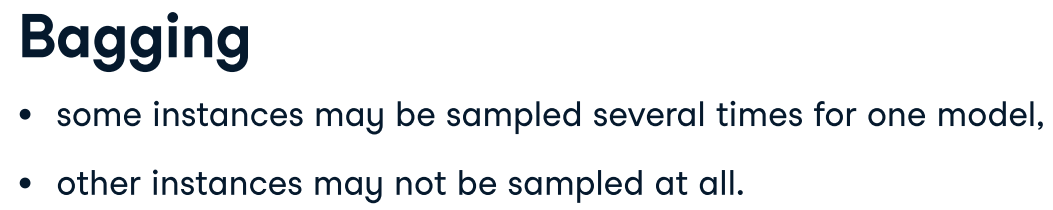

Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instance may not be sampled at all.

3. Out Of Bag (OOB) instances

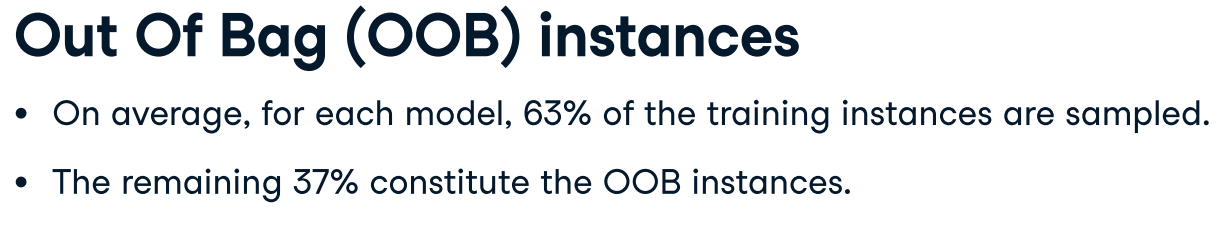

On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances. Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as OOB-evaluation.

4. OOB Evaluation

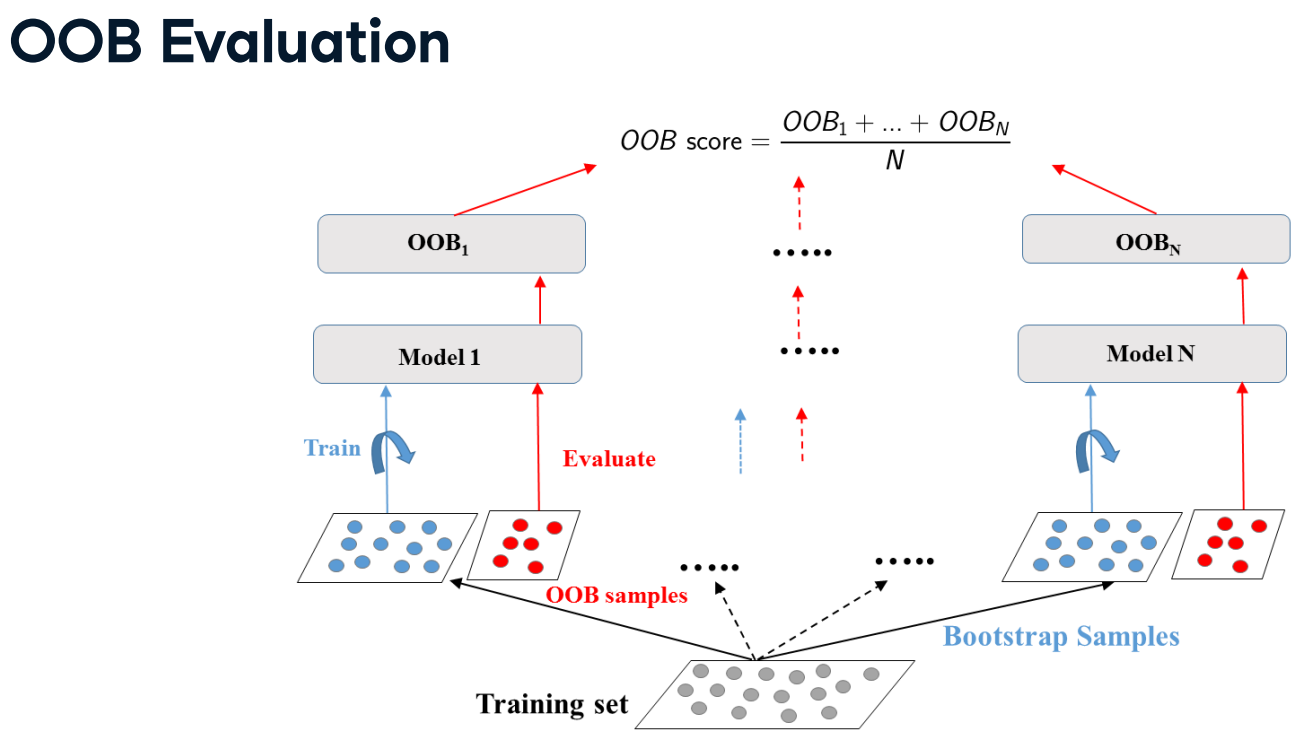

To understand OOB-evaluation more concretely, take a look at this diagram. Here, for each model, the bootstrap instances are shown in blue while the OOB-instances are shown in red. Each of the N models constituting the ensemble is then trained on its corresponding bootstrap samples and evaluated on the OOB instances. This leads to the obtainment of N OOB scores labeled OOB1 to OOBN. The OOB-score of the bagging ensemble is evaluated as the average of these N OOB scores as shown by the formula on top.

5. OOB Evaluation in sklearn (Breast Cancer Dataset)

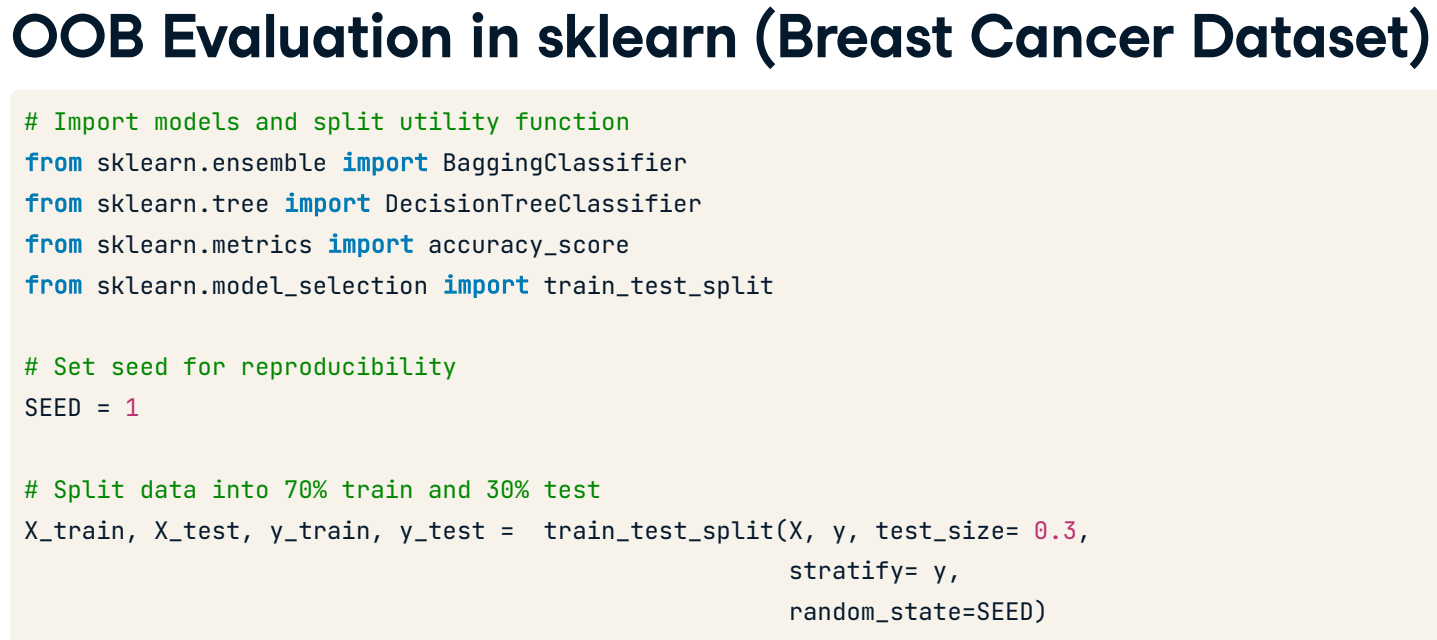

Alright! Now it's time to see OOB-evaluation in action. Again, we'll be classifying cancerous cells as malignant or benign from the breast cancer dataset which is already loaded. After importing BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split, split the dataset in a stratified way into 70%-train and 30%-test by setting the parameter stratify to y.

6. OOB Evaluation in sklearn (Breast Cancer Dataset)

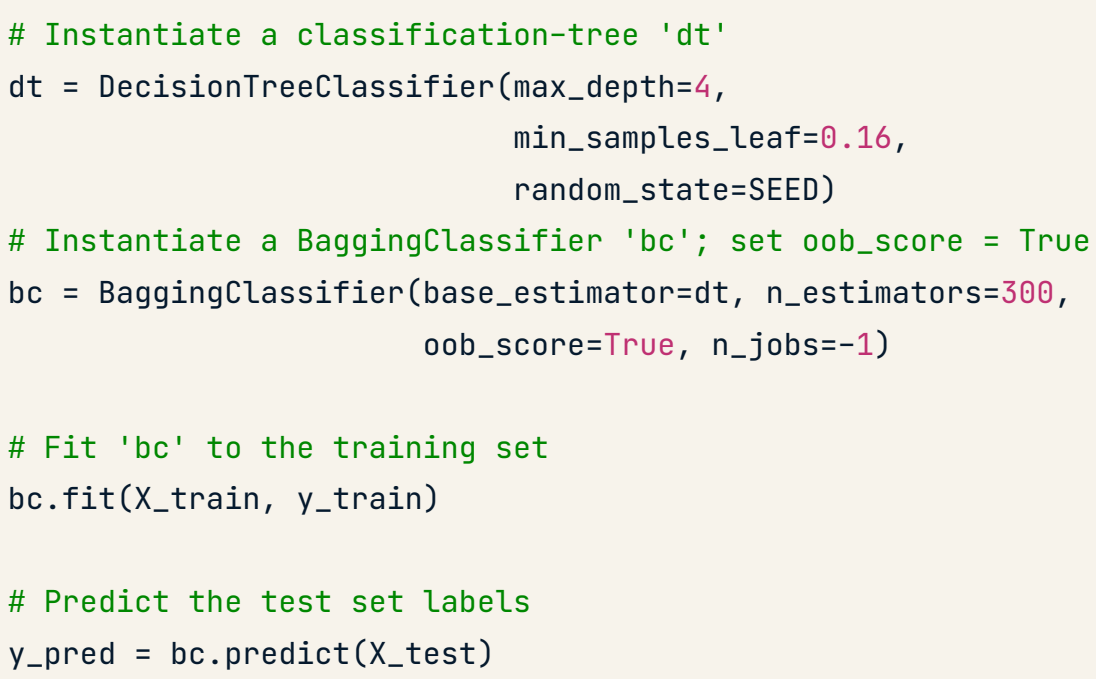

Now, first instantiate a classification tree dt with a maximum-depth of 4 and a minimum percentage of samples per leaf equal to 16%. Then instantiate a BaggingClassifier called bc that consists of 300 classification trees. This can be done by setting the parameters n_estimators to 300 and base_estimator to dt. Importantly, set the parameter oob_score to True in order to evaluate the OOB-accuracy of bc after training. Note that in scikit-learn, the OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors. Now fit bc to the training set and predict the test set labels.

7. OOB Evaluation in sklearn (Breast Cancer Dataset)

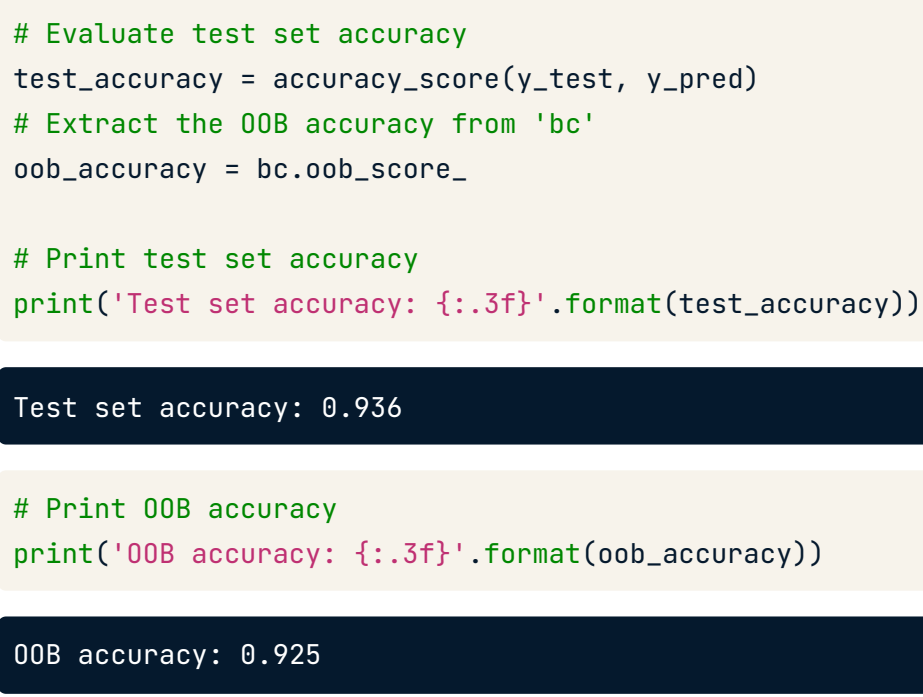

Assign the test set accuracy to test_accuracy. Finally, evaluate the OOB-accuracy of bc by extracting the attribute oob_score_ from the trained instance; assign the result to oob_accuracy and print out the results. The test-set accuracy is about 93.6% and the OOB-accuracy is about 92.5%. The two obtained accuracies are pretty close though not exactly equal. These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation.

8. Let's practice!

Now let's try some examples.

### Exercise

**Prepare the ground**

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

**Instructions**

- Import BaggingClassifier from sklearn.ensemble.
- Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.
- Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.

In [86]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                      n_estimators=50,
                      oob_score=True,
                      random_state=1)

Great! In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy.

### Exercise

**OOB Score vs Test Set Score**

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

**Instructions**

- Fit bc to the training set and predict the test set labels and assign the results to y_pred.
- Evaluate the test set accuracy acc_test by calling accuracy_score.
- Evaluate bc's OOB accuracy acc_oob by extracting the attribute oob_score_ from bc.

In [87]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.655, OOB accuracy: 0.689


Great work! The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

## 3 03 Random Forests

1. Random Forests

You will now learn about another ensemble learning method known as Random Forests.

2. Bagging

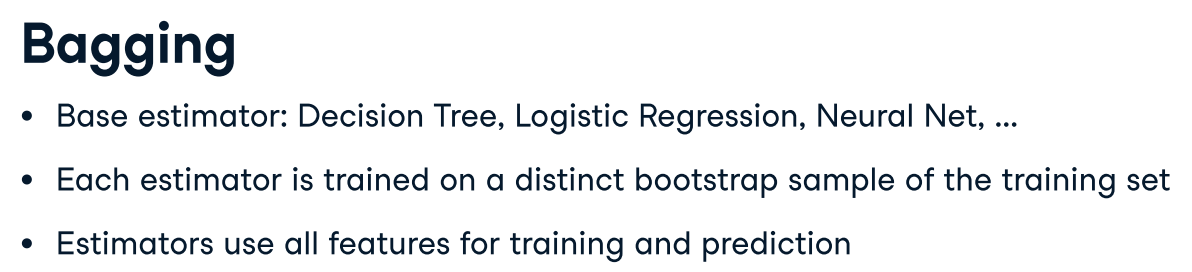

Recall that in bagging the base estimator could be any model including a decision tree, logistic regression or even a neural network. Each estimator is trained on a distinct bootstrap sample drawn from the training set using all available features.

3. Further Diversity with Random Forests

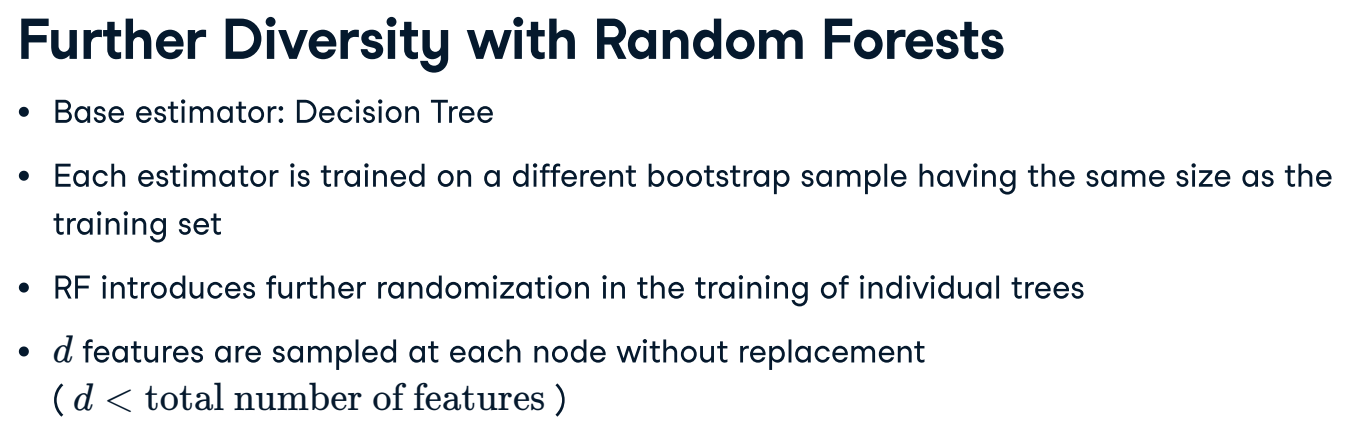

Random Forests is an ensemble method that uses a decision tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. Random forests introduces further randomization than bagging when training each of the base estimators. When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features.

4. Random Forests: Training

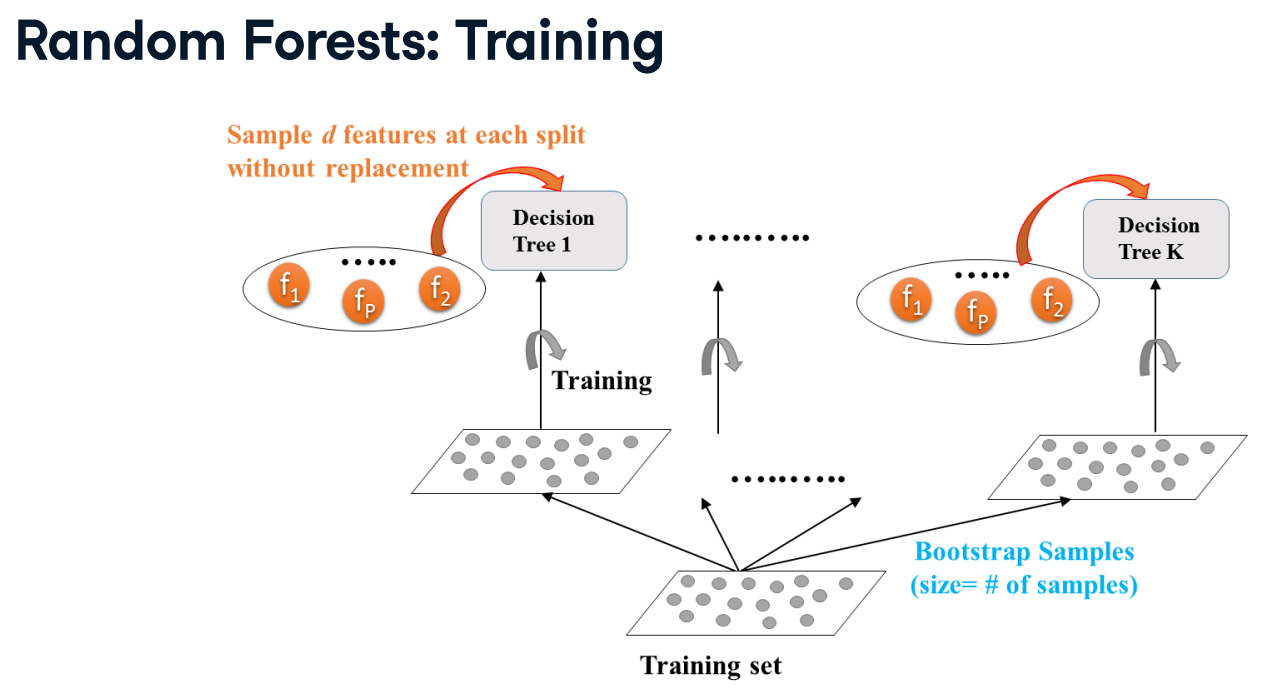

The diagram here shows the training procedure for random forests. Notice how each tree forming the ensemble is trained on a different bootstrap sample from the training set. In addition, when a tree is trained, at each node, only d features are sampled from all features without replacement. The node is then split using the sampled feature that maximizes information gain. In scikit-learn d defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.

5. Random Forests: Prediction

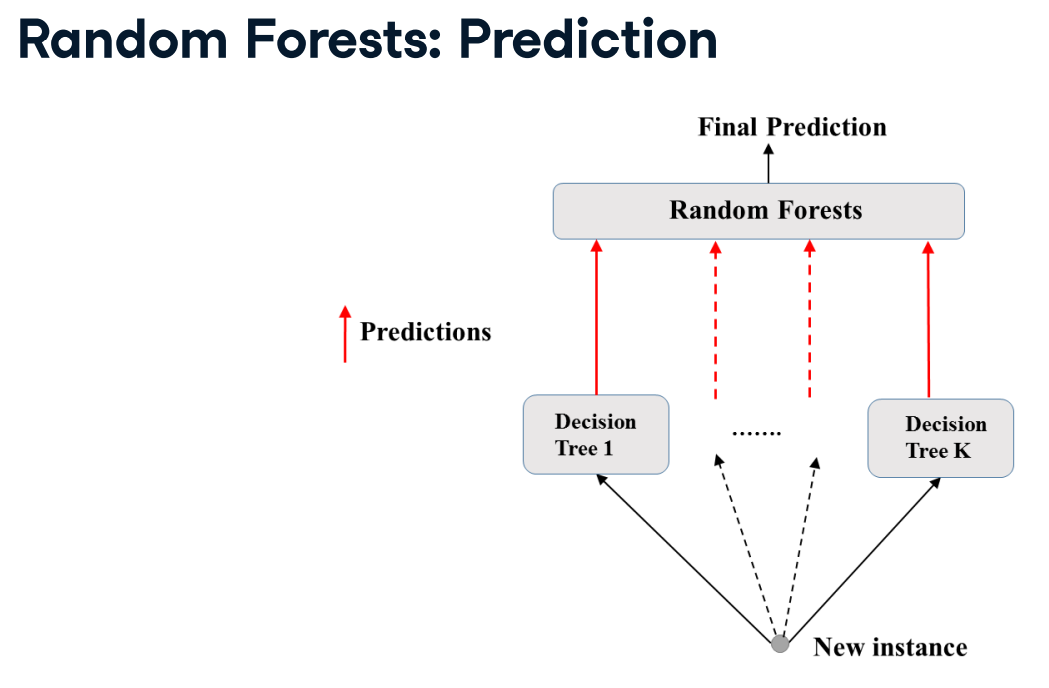

Once trained, predictions can be made on new instances. When a new instance is fed to the different base estimators, each of them outputs a prediction. The predictions are then collected by the random forests meta-classifier and a final prediction is made depending on the nature of the problem.

6. Random Forests: Classification & Regression

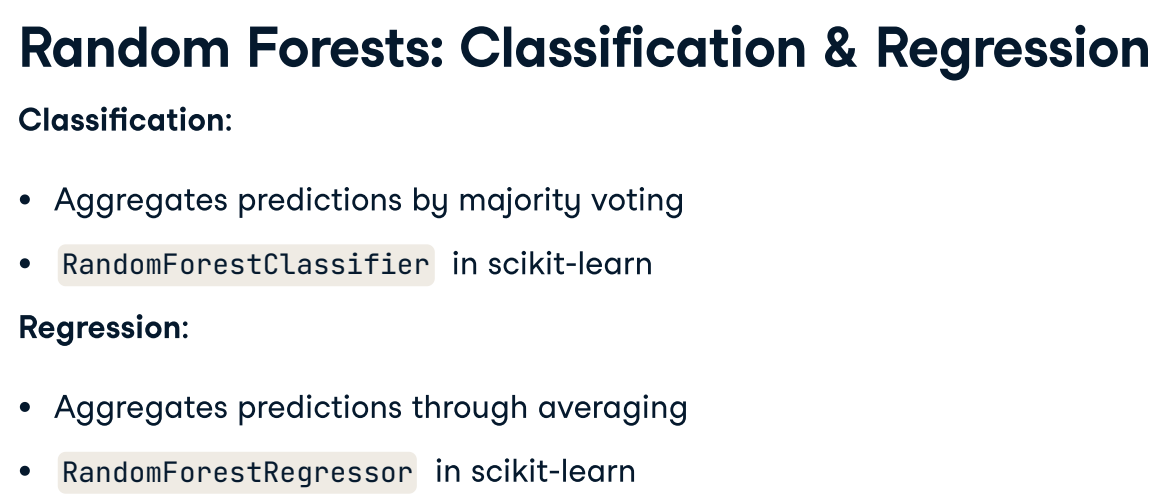

For classification, the final prediction is made by majority voting. The corresponding scikit-learn class is RandomForestClassifier. For regression, the final prediction is the average of all the labels predicted by the base estimators. The corresponding scikit-learn class is RandomForestRegressor. In general, Random Forests achieves a lower variance than individual trees.

7. Random Forests Regressor in sklearn (auto dataset)

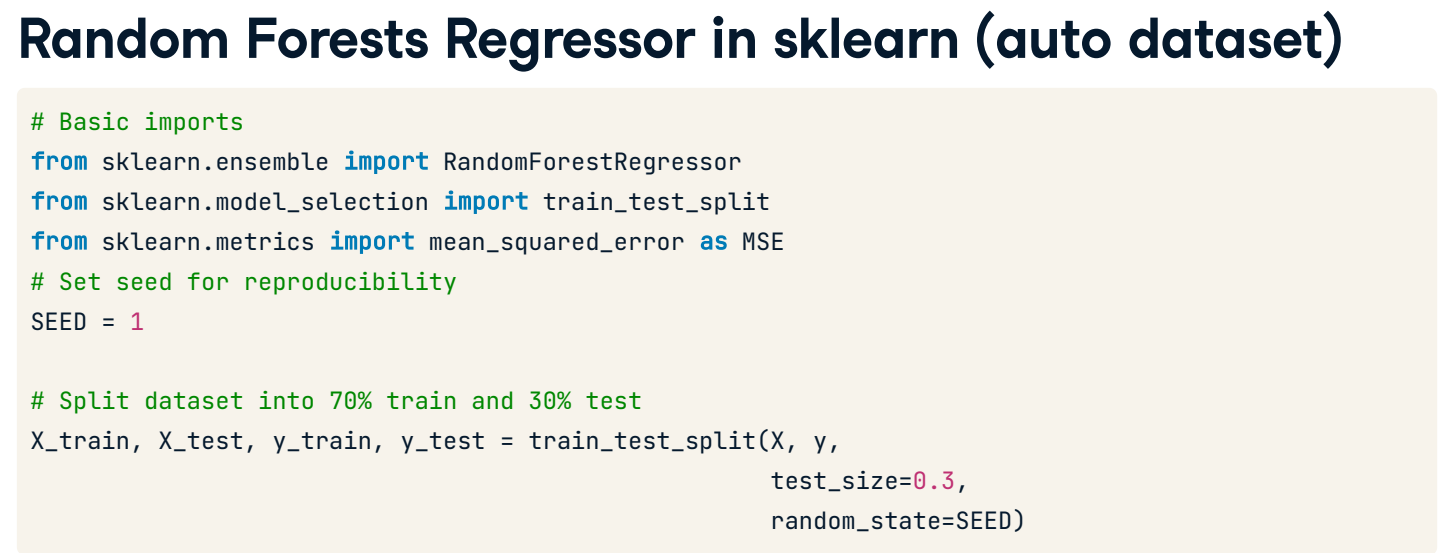

Alright, now it's time to put all this into practice. Here, you'll train a random forests regressor to the auto-dataset which you were introduced to in previous chapters. Note that the dataset is already loaded. After importing RandomForestRegressor, train_test_split and mean_squared_error as MSE, split the dataset into 70%-train and 30%-test as shown here.

8. Random Forests Regressor in sklearn (auto dataset)

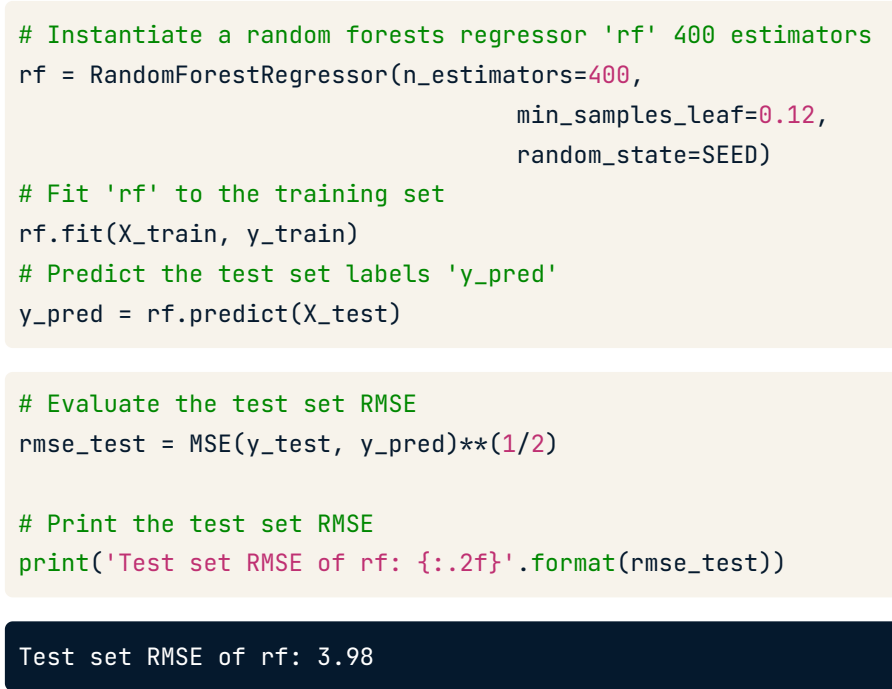

Then instantiate a RandomForestRegressor consisting of 400 regression trees. This can be done by setting n_estimators to 400. In addition, set min_samples_leaf to 0-dot-12 so that each leaf contains at least 12% of the data used in training. You can now fit rf to the training set and predict the test set labels. Finally, print the test set RMSE. The result shows that rf achieves a test set RMSE of 3-dot-98; this error is smaller than that achieved by a single regression tree which is 4-dot-43.

9. Feature Importance

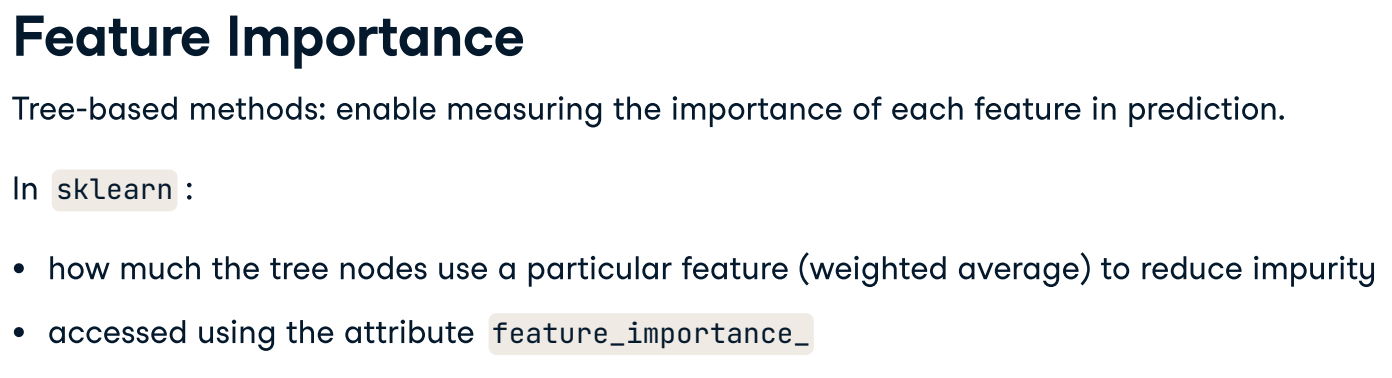

When a tree based method is trained, the predictive power of a feature or its importance can be assessed. In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity. Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction. Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the feature_importance_ attribute from the model.

10. Feature Importance in sklearn

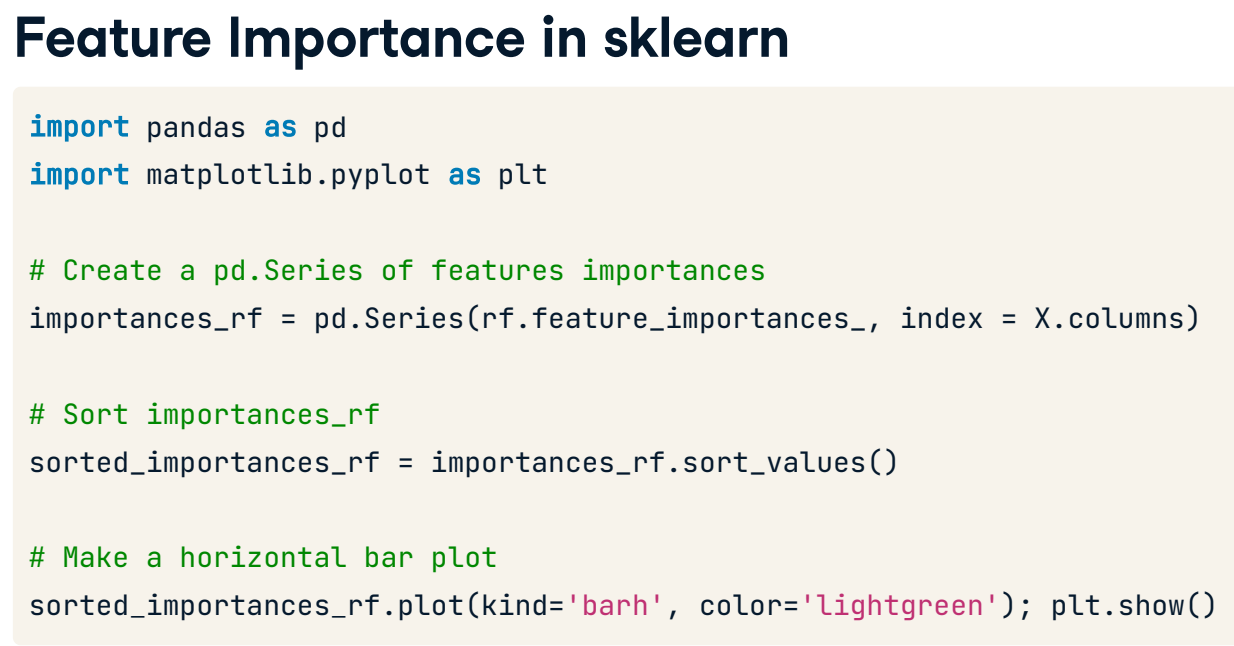

To visualize the importance of features as assessed by rf, you can create a pandas series of the features importances as shown here and then sort this series and make a horiztonal-barplot.

11. Feature Importance in sklearn

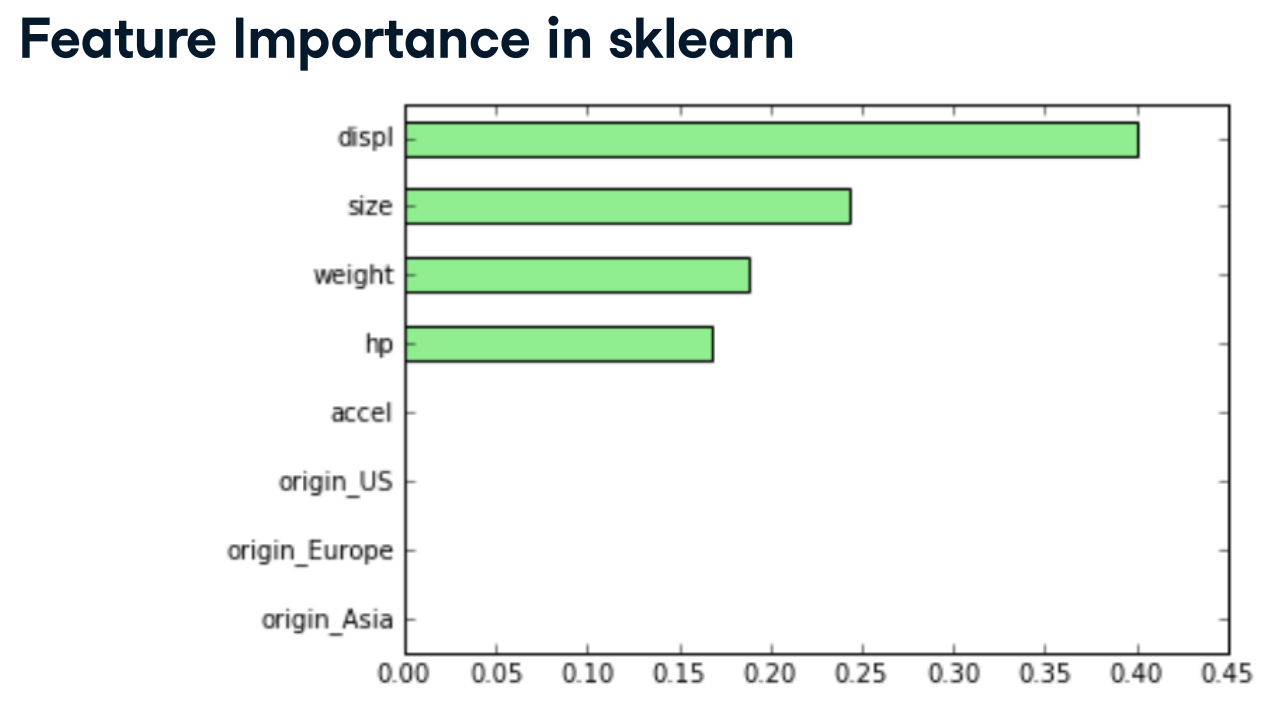

The results show that, according to rf, displ, size, weight and hp are the most predictive features.

12. Let's practice!

Now let's try some examples.

In [88]:
bike

hr  holiday  workingday  temp   hum  windspeed  cnt  instant  mnth  yr  \
0      0        0           0  0.76  0.66     0.0000  149    13004     7   1   
1      1        0           0  0.74  0.70     0.1343   93    13005     7   1   
2      2        0           0  0.72  0.74     0.0896   90    13006     7   1   
3      3        0           0  0.72  0.84     0.1343   33    13007     7   1   
4      4        0           0  0.70  0.79     0.1940    4    13008     7   1   
...   ..      ...         ...   ...   ...        ...  ...      ...   ...  ..   
1483  19        0           1  0.80  0.49     0.1343  452    14487     8   1   
1484  20        0           1  0.80  0.49     0.1343  356    14488     8   1   
1485  21        0           1  0.76  0.58     0.1940  303    14489     8   1   
1486  22        0           1  0.76  0.58     0.1940  277    14490     8   1   
1487  23        0           1  0.74  0.62     0.1045  174    14491     8   1   

      Clear to partly cloudy  Light Precipitation  Misty  
0                          1                    0      0  
1                          1                    0      0  
2                          1                    0      0  
3                          1                    0      0  
4                          1                    0      0  
...                      ...                  ...    ...  
1483                       1                    0      0  
1484                       1                    0      0  
1485                       1                    0      0  
1486                       1                    0      0  
1487                       1                    0      0  

[1488 rows x 13 columns]

In [89]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


In [90]:
bike.isnull().sum()

hr                        0
holiday                   0
workingday                0
temp                      0
hum                       0
windspeed                 0
cnt                       0
instant                   0
mnth                      0
yr                        0
Clear to partly cloudy    0
Light Precipitation       0
Misty                     0
dtype: int64

In [91]:
# Import the module
from sklearn.model_selection import train_test_split

X = bike.drop("cnt", axis=1)
y = bike["cnt"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [92]:
X

hr  holiday  workingday  temp   hum  windspeed  instant  mnth  yr  \
0      0        0           0  0.76  0.66     0.0000    13004     7   1   
1      1        0           0  0.74  0.70     0.1343    13005     7   1   
2      2        0           0  0.72  0.74     0.0896    13006     7   1   
3      3        0           0  0.72  0.84     0.1343    13007     7   1   
4      4        0           0  0.70  0.79     0.1940    13008     7   1   
...   ..      ...         ...   ...   ...        ...      ...   ...  ..   
1483  19        0           1  0.80  0.49     0.1343    14487     8   1   
1484  20        0           1  0.80  0.49     0.1343    14488     8   1   
1485  21        0           1  0.76  0.58     0.1940    14489     8   1   
1486  22        0           1  0.76  0.58     0.1940    14490     8   1   
1487  23        0           1  0.74  0.62     0.1045    14491     8   1   

      Clear to partly cloudy  Light Precipitation  Misty  
0                          1                    0      0  
1                          1                    0      0  
2                          1                    0      0  
3                          1                    0      0  
4                          1                    0      0  
...                      ...                  ...    ...  
1483                       1                    0      0  
1484                       1                    0      0  
1485                       1                    0      0  
1486                       1                    0      0  
1487                       1                    0      0  

[1488 rows x 12 columns]

In [93]:
y

0       149
1        93
2        90
3        33
4         4
       ... 
1483    452
1484    356
1485    303
1486    277
1487    174
Name: cnt, Length: 1488, dtype: int64

### Exercise

**Train an RF regressor**

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

**Instructions**

- Import RandomForestRegressor from sklearn.ensemble.
- Instantiate a RandomForestRegressor called rf consisting of 25 trees.
- Fit rf to the training set.

In [95]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

Great work! Next comes the test set RMSE evaluation part.

### Exercise

**Evaluate the RF regressor**

You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

**Instructions**

- Import mean_squared_error from sklearn.metrics as MSE.
- Predict the test set labels and assign the result to y_pred.
- Compute the test set RMSE and assign it to rmse_test.

In [96]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


Great work! You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

### Exercise

**Visualizing features importances**

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

**Instructions**

- Call the .sort_values() method on importances and assign the result to importances_sorted.
- Call the .plot() method on importances_sorted and set the arguments:
    - kind to 'barh'
    - color to 'lightgreen'

In [97]:
import matplotlib.pyplot as plt

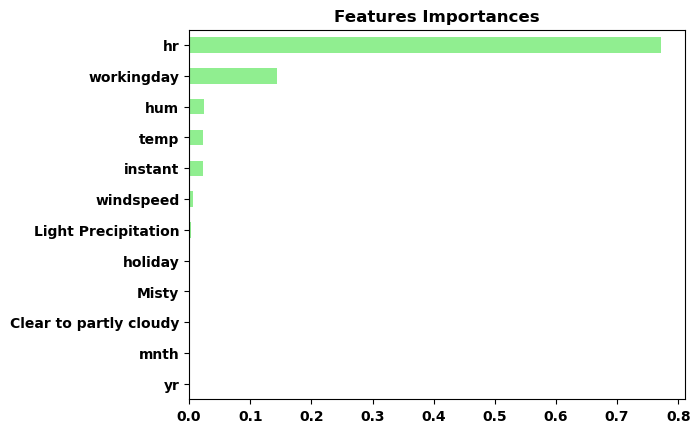

In [98]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Boosting</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. In this chapter, you'll be introduced to the two boosting methods of AdaBoost and Gradient Boosting.

## 4 01 Adaboost

1. AdaBoost

Boosting refers to an ensemble method in which many predictors are trained and each predictor learns from the errors of its predecessor.

2. Boosting

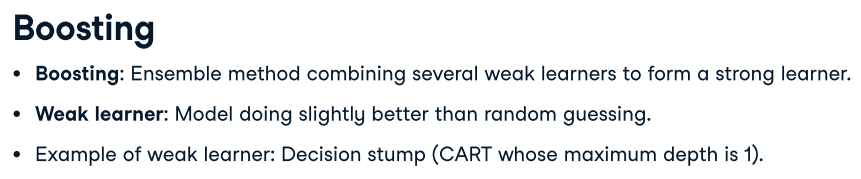

More formally, in boosting many weak learners are combined to form a strong learner. A weak learner is a model doing slightly better than random guessing. For example, a decision tree with a maximum-depth of one, known as a decision-stump, is a weak learner.

3. Boosting

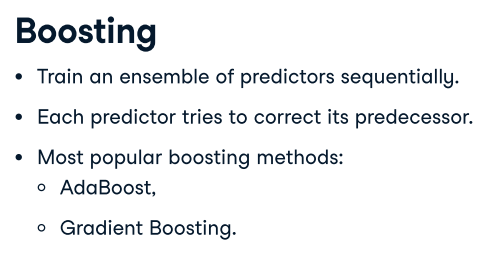

In boosting, an ensemble of predictors are trained sequentially and each predictor tries to correct the errors made by its predecessor. The two boosting methods you'll explore in this course are AdaBoost and Gradient Boosting.

4. Adaboost

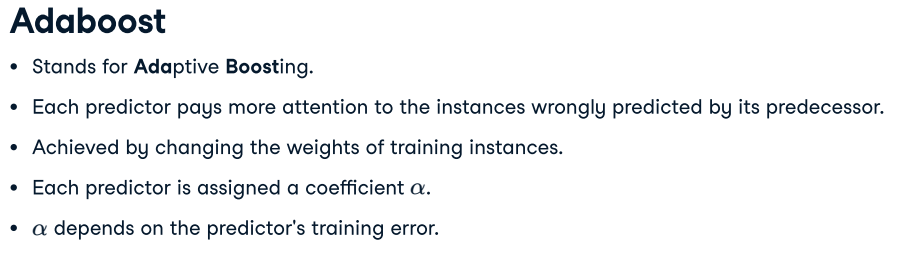

AdaBoost stands for Adaptive Boosting. In AdaBoost, each predictor pays more attention to the instances wrongly predicted by its predecessor by constantly changing the weights of training instances. Furthermore, each predictor is assigned a coefficient alpha that weighs its contribution in the ensemble's final prediction. Alpha depends on the predictor's training error.

5. AdaBoost: Training

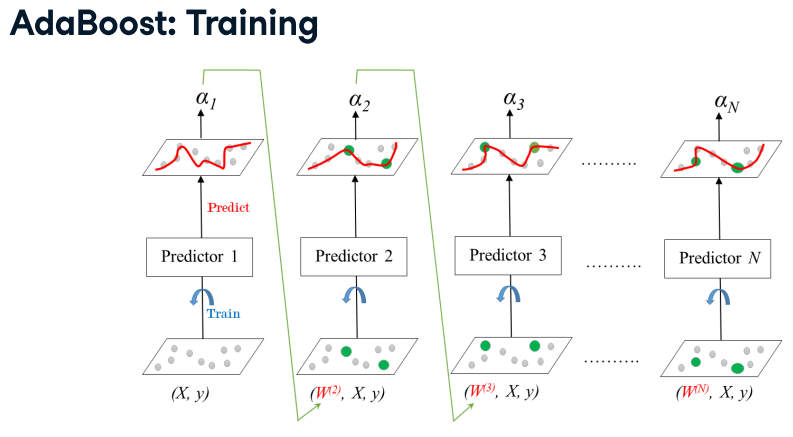

As shown in the diagram, there are N predictors in total. First, predictor1 is trained on the initial dataset (X,y), and the training error for predictor1 is determined. This error can then be used to determine alpha1 which is predictor1's coefficient. Alpha1 is then used to determine the weights W(2) of the training instances for predictor2. Notice how the incorrectly predicted instances shown in green acquire higher weights. When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances. This process is repeated sequentially, until the N predictors forming the ensemble are trained.

6. Learning Rate

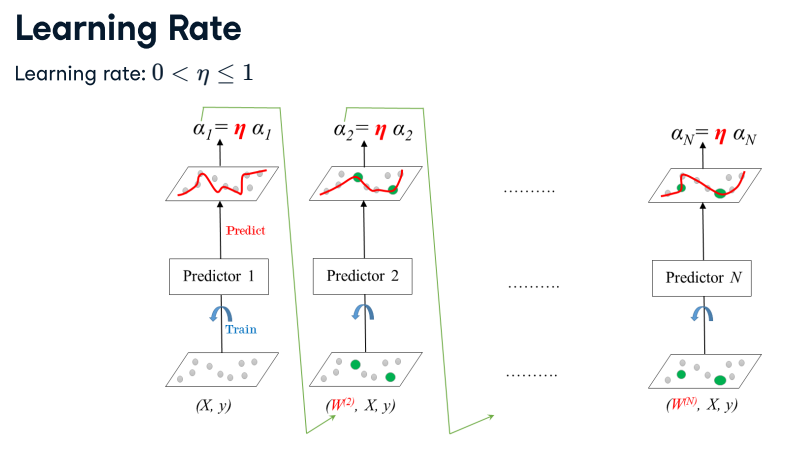

An important parameter used in training is the learning rate, eta. Eta is a number between 0 and 1; it is used to shrink the coefficient alpha of a trained predictor. It's important to note that there's a trade-off between eta and the number of estimators. A smaller value of eta should be compensated by a greater number of estimators.

7. AdaBoost: Prediction

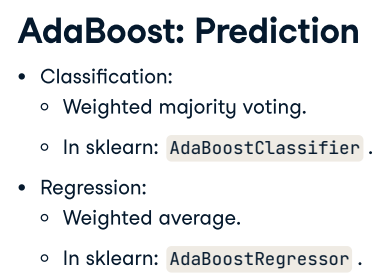

Once all the predictors in the ensemble are trained, the label of a new instance can be predicted depending on the nature of the problem. For classification, each predictor predicts the label of the new instance and the ensemble's prediction is obtained by weighted majority voting. For regression, the same procedure is applied and the ensemble's prediction is obtained by performing a weighted average. It's important to note that individual predictors need not to be CARTs. However CARTs are used most of the time in boosting because of their high variance.

8. AdaBoost Classification in sklearn (Breast Cancer dataset)

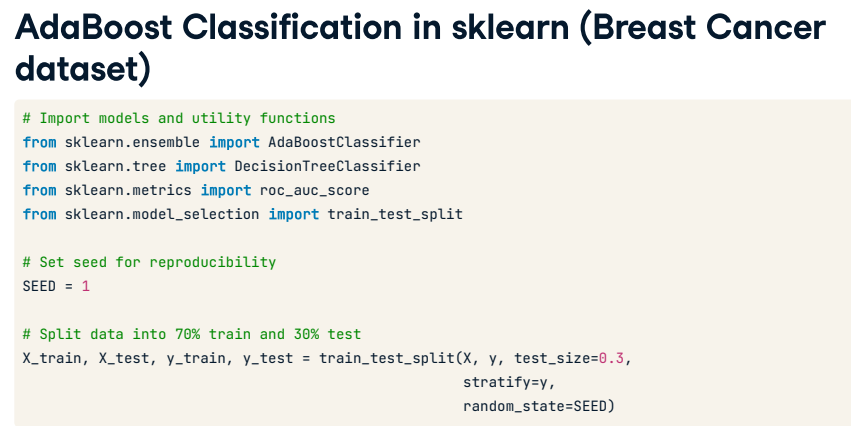

Alright, let's fit an AdaBoostClassifier to the breast cancer dataset and evaluate its ROC-AUC score. Note that the dataset is already loaded. After importing AdaBoostClassifier, DecisionTreeClassifier, roc_auc_score, and train_test_split, split the data into 70%-train and 30%-test as shown here.

9. AdaBoost Classification in sklearn (Breast Cancer dataset)

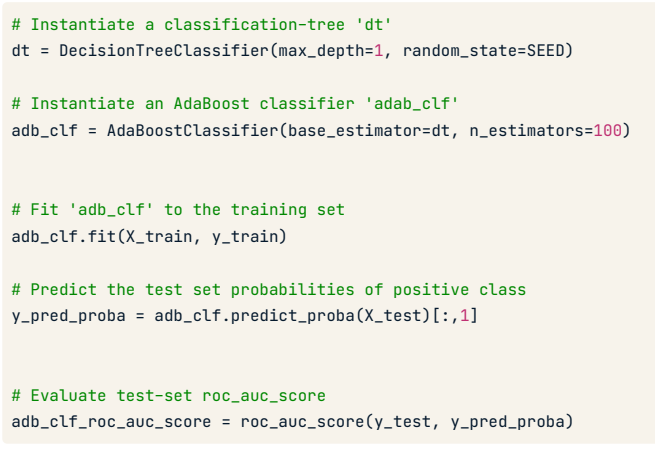

Now instantiate a DecisionTreeClassifier with the parameter max_depth set to 1. After that, instantiate an AdaBoostClassifier called adb_clf consisting of 100 decision-stumps. This can be done by setting the parameters base_estimator to dt and n_estimators to 100. Then, fit adb_clf to the training set and predict the probability of obtaining the positive class in the test set as shown here. This enables you to evaluate the ROC-AUC score of adb_clf by calling the function roc_auc_score and passing the parameters y_test and y_pred_proba.

10. AdaBoost Classification in sklearn (Breast Cancer dataset)

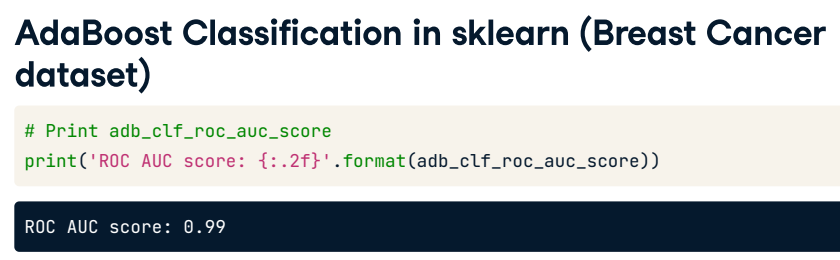

Finally, you can print the result which shows that the AdaBoostClassifier achieves a ROC-AUC score of about 0-dot-99.

11. Let's practice!

Now it's your turn.

In [99]:
breast

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [100]:
liver_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [101]:
liver_patient.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [102]:
drop_liver_patient = liver_patient.dropna()

In [103]:
drop_liver_patient.shape

(579, 11)

In [104]:
# Create liver_patient_dummies
liver_patient_dummies = pd.get_dummies(drop_liver_patient, drop_first=True)

In [105]:
# Print the new DataFrame's shape
print("Shape of liver_patient_dummies: {}".format(liver_patient_dummies.shape))

Shape of liver_patient_dummies: (579, 11)


### Exercise

**Define the AdaBoost classifier**

In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

**Instructions**

- Import AdaBoostClassifier from sklearn.ensemble.
- Instantiate a DecisionTreeClassifier with max_depth set to 2.
- Instantiate an AdaBoostClassifier consisting of 180 trees and setting the base_estimator to dt.

In [106]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

Well done! Next comes training ada and evaluating the probability of obtaining the positive class in the test set.

### Exercise

**Train the AdaBoost classifier**

Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the .predict_proba() method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:

    - ada.predict_proba(X_test)[:,1]

The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the instantiated model ada from the previous exercise.

**Instructions**

- Fit ada to the training set.
- Evaluate the probabilities of obtaining the positive class in the test set.

In [107]:
# Import the module
from sklearn.model_selection import train_test_split

X = liver_patient_dummies.drop("Dataset", axis=1).values
y = liver_patient_dummies["Dataset"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [108]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

Great work! Next, you'll evaluate ada's ROC AUC score.

### Exercise

**Evaluate the AdaBoost classifier**

Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the roc_auc_score() function from sklearn.metrics.

The arrays y_test and y_pred_proba that you computed in the previous exercise are available in your workspace.

**Instructions**

- Import roc_auc_score from sklearn.metrics.
- Compute ada's test set ROC AUC score, assign it to ada_roc_auc, and print it out.

In [109]:
y_pred = ada.predict(X_test)
y_pred

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1], dtype=int64)

In [110]:
y_pred_proba

array([0.23788866, 0.51460111, 0.48674279, 0.42807246, 0.48448359,
       0.464249  , 0.49316827, 0.46215481, 0.3023913 , 0.50667764,
       0.52292189, 0.49383566, 0.49308433, 0.52260275, 0.49866186,
       0.46405887, 0.50015049, 0.50592004, 0.43811718, 0.50329207,
       0.31400951, 0.45515142, 0.45519325, 0.50844874, 0.34674086,
       0.42031306, 0.46618791, 0.48088629, 0.49466258, 0.39332796,
       0.52946643, 0.43851094, 0.26400533, 0.47532377, 0.49739777,
       0.44699988, 0.50890174, 0.47321562, 0.49881795, 0.48449065,
       0.50105932, 0.43297378, 0.46746681, 0.53761731, 0.50842634,
       0.48750805, 0.48008831, 0.48960697, 0.36081861, 0.42900344,
       0.49665637, 0.47896232, 0.18673053, 0.48936847, 0.52050756,
       0.53840801, 0.49391508, 0.52657527, 0.43446824, 0.38403953,
       0.51748639, 0.4034989 , 0.50255656, 0.24930622, 0.46915836,
       0.50360982, 0.50709986, 0.38403953, 0.48251583, 0.50272232,
       0.50894921, 0.47732665, 0.42047621, 0.52173107, 0.53262

In [111]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.74


Not bad! This untuned AdaBoost classifier achieved a ROC AUC score of 0.70!

## 4 02 Gradient Boosting (GB)

1. Gradient Boosting (GB)

Gradient Boosting is a popular boosting algorithm that has a proven track record of winning many machine learning competitions.

2. Gradient Boosted Trees

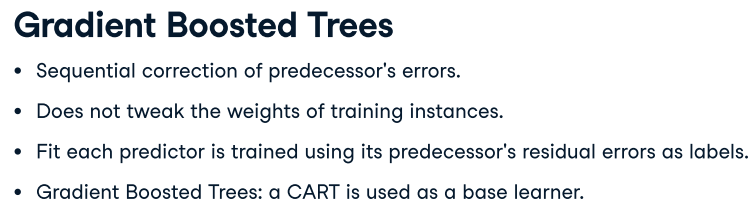

In gradient boosting, each predictor in the ensemble corrects its predecessor's error. In contrast to AdaBoost, the weights of the training instances are not tweaked. Instead, each predictor is trained using the residual errors of its predecessor as labels. In the following slides, you'll explore the technique known as gradient boosted trees where the base learner is a CART.

3. Gradient Boosted Trees for Regression: Training

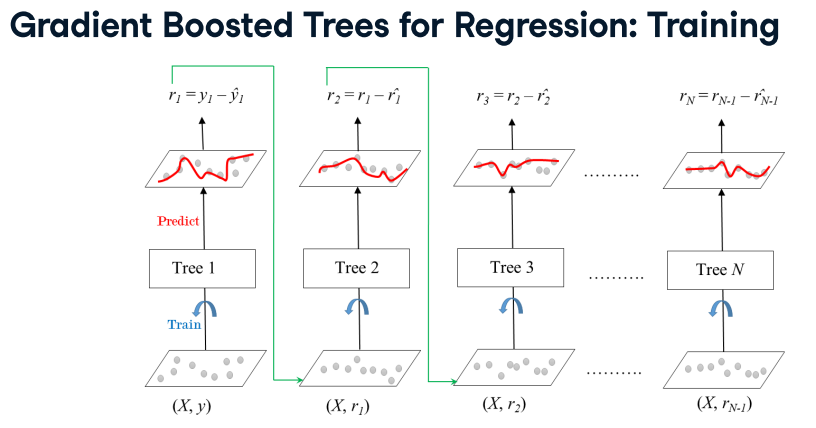

To understand how gradient boosted trees are trained for a regression problem, take a look at the diagram here. The ensemble consists of N trees. Tree1 is trained using the features matrix X and the dataset labels y. The predictions labeled y1hat are used to determine the training set residual errors r1. Tree2 is then trained using the features matrix X and the residual errors r1 of Tree1 as labels. The predicted residuals r1hat are then used to determine the residuals of residuals which are labeled r2. This process is repeated until all of the N trees forming the ensemble are trained.

4. Shrinkage

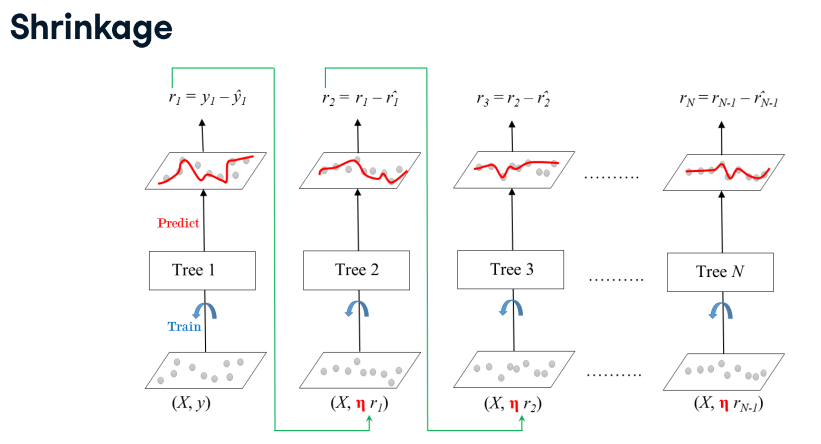

An important parameter used in training gradient boosted trees is shrinkage. In this context, shrinkage refers to the fact that the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate eta which is a number between 0 and 1. Similarly to AdaBoost, there's a trade-off between eta and the number of estimators. Decreasing the learning rate needs to be compensated by increasing the number of estimators in order for the ensemble to reach a certain performance.

5. Gradient Boosted Trees: Prediction

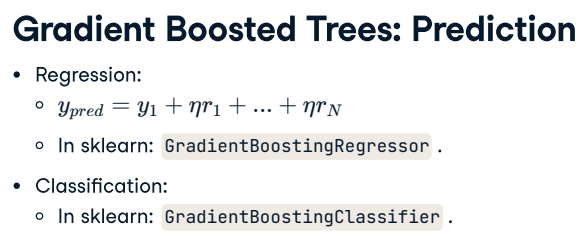

Once all trees in the ensemble are trained, prediction can be made. When a new instance is available, each tree predicts a label and the final ensemble prediction is given by the formula shown on this slide. In scikit-learn, the class for a gradient boosting regressor is GradientBoostingRegressor. Though not discussed in this course, a similar algorithm is used for classification problems. The class implementing gradient-boosted-classification in scikit-learn is GradientBoostingClassifier.

6. Gradient Boosting in sklearn (auto dataset)

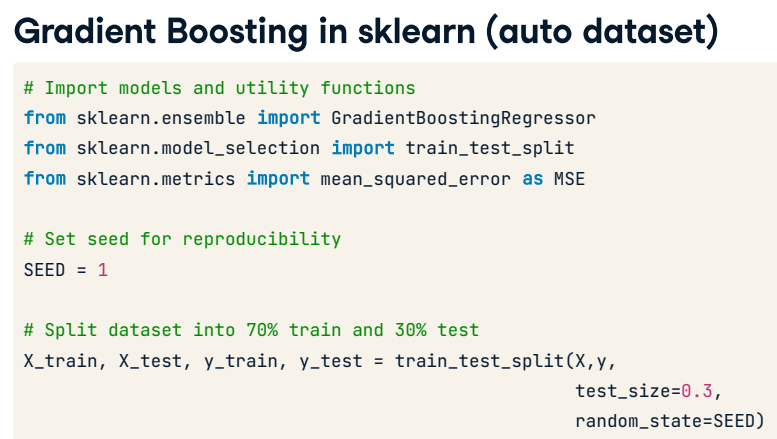

Great! Now it's time to get your hands dirty by predicting the miles per gallon consumption of cars in the auto-dataset. Note that the dataset is already loaded. First, import GradientBoostingRegressor from sklearn.ensemble. Also, import the functions train_test_split and mean_squared_error as MSE as shown here. Then split the dataset into 70%-train and 30%-test.

7. Gradient Boosting in sklearn (auto dataset)

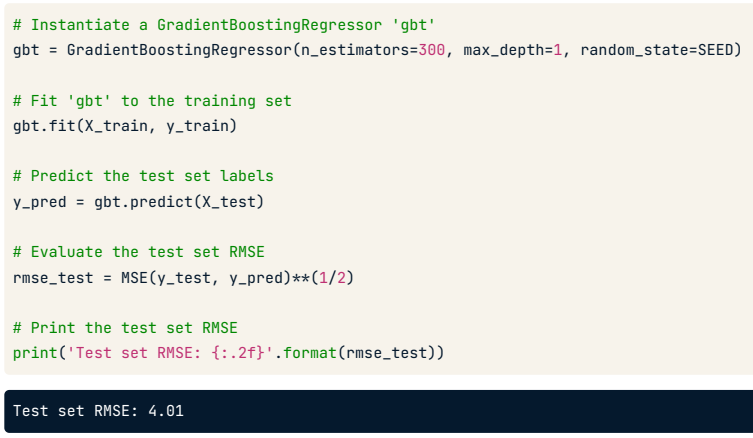

Now instantiate a GradientBoostingRegressor gbt consisting of 300 decision-stumps. This can be done by setting the parameters n_estimators to 300 and max_depth to 1. Finally, fit gbt to the training set and predict the test set labels. Compute the test set RMSE as shown here and print the value. The result shows that gbt achieves a test set RMSE of 4-dot-01.

8. Let's practice!

Time to put this into practice.

### Exercise

**Define the GB regressor**

You'll now revisit the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

**Instructions**

- Import GradientBoostingRegressor from sklearn.ensemble.
- Instantiate a gradient boosting regressor by setting the parameters:
       - max_depth to 4
       - n_estimators to 200

In [112]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
                               n_estimators=200,
                               random_state=2)

Awesome! Time to train the regressor and predict test set labels.

### Exercise

**Train the GB regressor**

You'll now train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays y_train and y_test are available in your workspace. In addition, we have also loaded the model instance gb that you defined in the previous exercise.

**Instructions**

- Fit gb to the training set.
- Predict the test set labels and assign the result to y_pred.

In [113]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


In [114]:
# Import the module
from sklearn.model_selection import train_test_split

X = bike.drop("cnt", axis=1)
y = bike["cnt"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [115]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

Great work! Time to evaluate the test set RMSE!

### Exercise

**Evaluate the GB regressor**

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb.

    - y_test and predictions y_pred are available in your workspace.

**Instructions**

- Import mean_squared_error from sklearn.metrics as MSE.
- Compute the test set MSE and assign it to mse_test.
- Compute the test set RMSE and assign it to rmse_test.

In [116]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


Great work!

## 4 03 Stochastic Gradient Boosting (SGB)

1. Stochastic Gradient Boosting (SGB)

2. Gradient Boosting: Cons

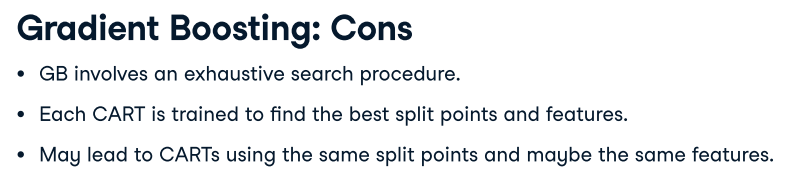

Gradient boosting involves an exhaustive search procedure. Each tree in the ensemble is trained to find the best split-points and the best features. This procedure may lead to CARTs that use the same split-points and possibly the same features.

3. Stochastic Gradient Boosting

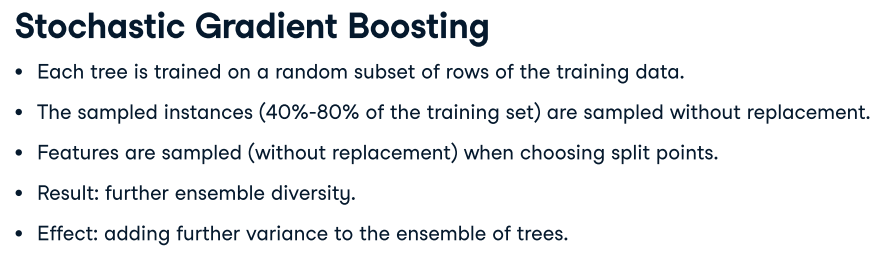

To mitigate these effects, you can use an algorithm known as stochastic gradient boosting. In stochastic gradient boosting, each CART is trained on a random subset of the training data. This subset is sampled without replacement. Furthermore, at the level of each node, features are sampled without replacement when choosing the best split-points. As a result, this creates further diversity in the ensemble and the net effect is adding more variance to the ensemble of trees.

4. Stochastic Gradient Boosting: Training

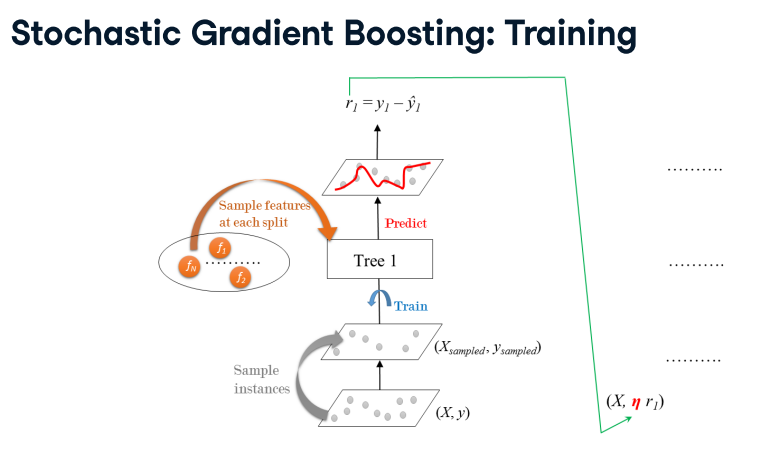

Let's take a closer look at the training procedure used in stochastic gradient boosting by examining the diagram shown on this slide. First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without replacement. The sampled data is then used for training a tree. However, not all features are considered when a split is made. Instead, only a certain randomly sampled fraction of these features are used for this purpose. Once a tree is trained, predictions are made and the residual errors can be computed. These residual errors are multiplied by the learning rate eta and are fed to the next tree in the ensemble. This procedure is repeated sequentially until all the trees in the ensemble are trained. The prediction procedure for a new instance in stochastic gradient boosting is similar to that of gradient boosting.

5. Stochastic Gradient Boosting in sklearn (auto dataset)

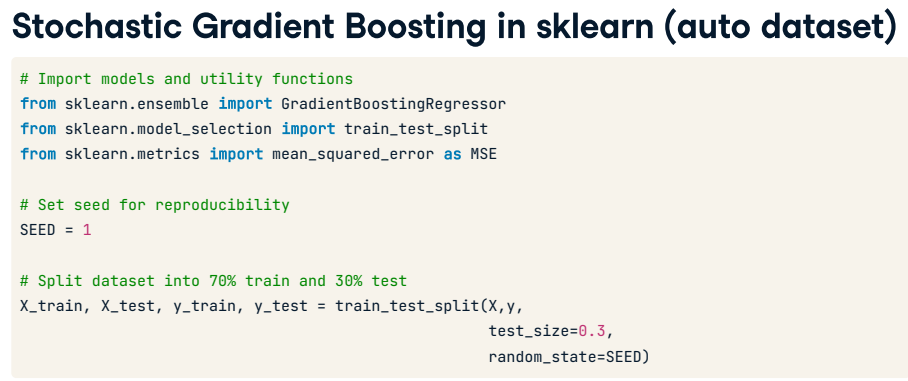

Alright, now it's time to put this into practice. As in the last video, we'll be dealing with the auto-dataset which is already loaded. Perform the same imports that were introduced in the previous lesson and split the data.

6. Stochastic Gradient Boosting in sklearn (auto dataset)

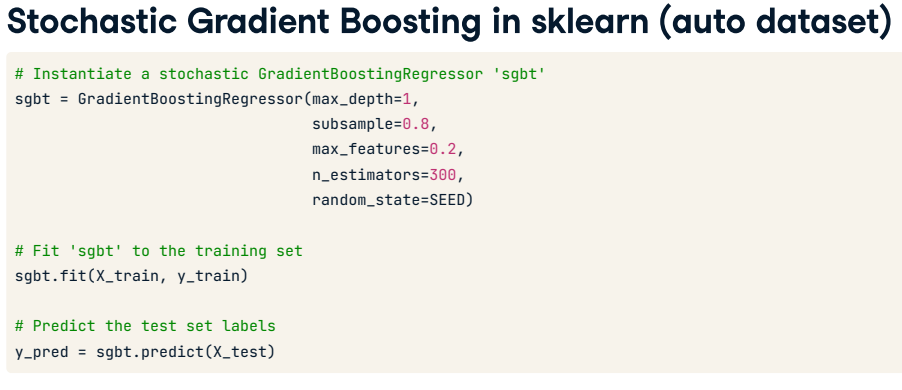

Now define a stochastic-gradient-boosting-regressor named sgbt consisting of 300 decision-stumps. This can be done by setting the parameters max_depth to 1 and n_estimators to 300. Here, the parameter subsample was set to 0-dot-8 in order for each tree to sample 80% of the data for training. Finally, the parameter max_features was set to 0-dot-2 so that each tree uses 20% of available features to perform the best-split. Once done, fit sgbt to the training set and predict the test set labels.

7. Stochastic Gradient Boosting in sklearn (auto dataset)

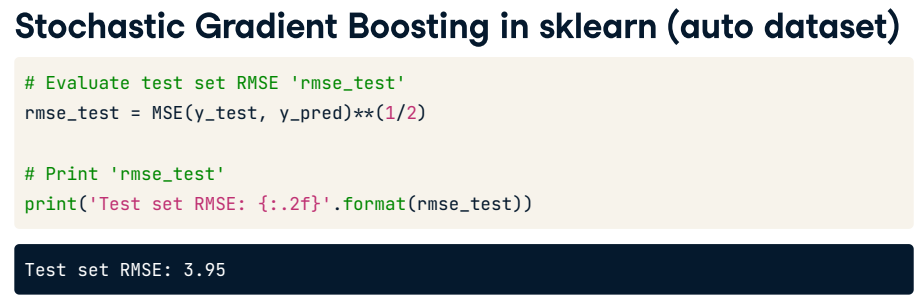

Finally, compute the test set RMSE and print it. The result shows that sgbt achieves a test set RMSE of 3-dot-95.

8. Let's practice!

Now let's try some examples.

### Exercise

**Regression with SGB**

As in the exercises from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

**Instructions**

- Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:
    - max_depth to 4 and n_estimators to 200,
    - subsample to 0.9, and
    - max_features to 0.75.

In [117]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
                                 subsample=0.9,
                                 max_features=0.75,
                                 n_estimators=200,
                                 random_state=2)

Well done!

### Exercise

**Train the SGB regressor**

In this exercise, you'll train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices X_train and X_test, the arrays of labels y_train and y_test, and the model instance sgbr that you defined in the previous exercise are available in your workspace.

**Instructions**

- Fit sgbr to the training set.
- Predict the test set labels and assign the results to y_pred.

In [118]:
bike

hr  holiday  workingday  temp   hum  windspeed  cnt  instant  mnth  yr  \
0      0        0           0  0.76  0.66     0.0000  149    13004     7   1   
1      1        0           0  0.74  0.70     0.1343   93    13005     7   1   
2      2        0           0  0.72  0.74     0.0896   90    13006     7   1   
3      3        0           0  0.72  0.84     0.1343   33    13007     7   1   
4      4        0           0  0.70  0.79     0.1940    4    13008     7   1   
...   ..      ...         ...   ...   ...        ...  ...      ...   ...  ..   
1483  19        0           1  0.80  0.49     0.1343  452    14487     8   1   
1484  20        0           1  0.80  0.49     0.1343  356    14488     8   1   
1485  21        0           1  0.76  0.58     0.1940  303    14489     8   1   
1486  22        0           1  0.76  0.58     0.1940  277    14490     8   1   
1487  23        0           1  0.74  0.62     0.1045  174    14491     8   1   

      Clear to partly cloudy  Light Precipitation  Misty  
0                          1                    0      0  
1                          1                    0      0  
2                          1                    0      0  
3                          1                    0      0  
4                          1                    0      0  
...                      ...                  ...    ...  
1483                       1                    0      0  
1484                       1                    0      0  
1485                       1                    0      0  
1486                       1                    0      0  
1487                       1                    0      0  

[1488 rows x 13 columns]

In [119]:
# Import the module
from sklearn.model_selection import train_test_split

X = bike.drop("cnt", axis=1)
y = bike["cnt"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [120]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

Great! Next comes test set evaluation!

### Exercise

**Evaluate the SGB regressor**

You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

y_pred and y_test are available in your workspace.

**Instructions**

- Import mean_squared_error as MSE from sklearn.metrics.
- Compute test set MSE and assign the result to mse_test.
- Compute test set RMSE and assign the result to rmse_test.

In [121]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.260


The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor (which was 52.071)!

## <a id="5"></a>
<font color="lightseagreen" size=+2.5><b>5. Model Tuning</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

The hyperparameters of a machine learning model are parameters that are not learned from data. They should be set prior to fitting the model to the training set. In this chapter, you'll learn how to tune the hyperparameters of a tree-based model using grid search cross validation.

## 5 01 Tuning a CART's hyperparameters

1. Tuning a CART's hyperparameters

To obtain a better performance, the hyperparameters of a machine learning should be tuned.

2. Hyperparameters

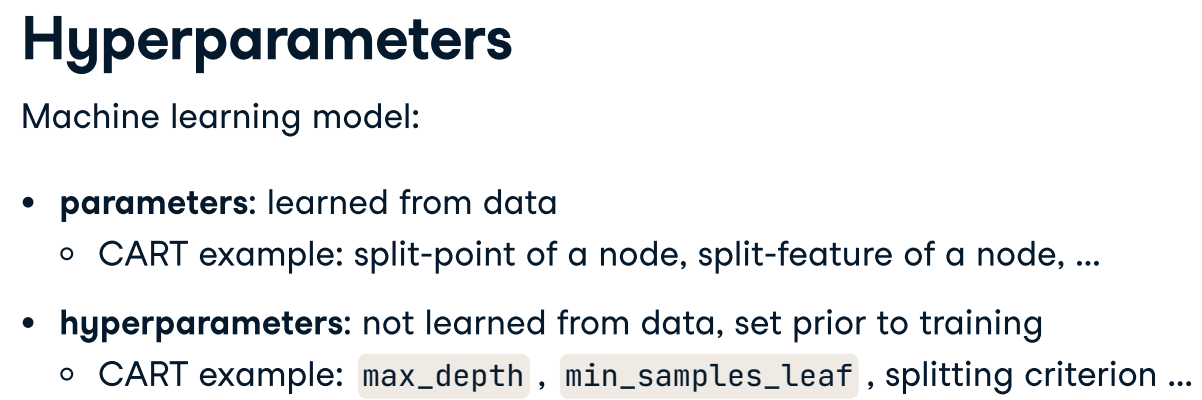

Machine learning models are characterized by parameters and hyperparameters. Parameters are learned from data through training; examples of parameters include the split-feature and the split-point of a node in a CART. Hyperparameters are not learned from data; they should be set prior to training. Examples of hyperparameters include the maximum-depth and the splitting-criterion of a CART.

3. What is hyperparameter tuning?

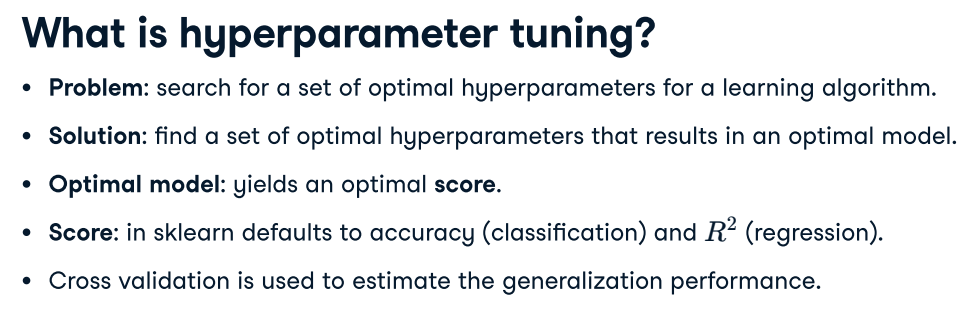

Hyperparameter tuning consists of searching for the set of optimal hyperparameters for the learning algorithm. The solution involves finding the set of optimal hyperparameters yielding an optimal model. The optimal model yields an optimal score. The score function measures the agreement between true labels and a model's predictions. In sklearn, it defaults to accuracy for classifiers and r-squared for regressors. A model's generalization performance is evaluated using cross-validation.

4. Why tune hyperparameters?

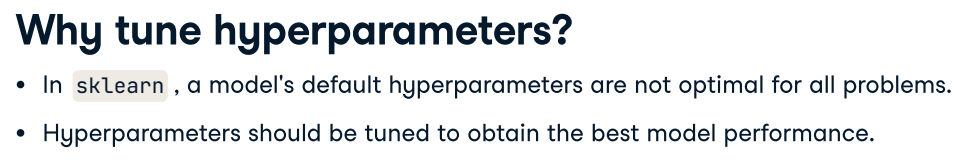

A legitimate question that you may ask is: why bother tuning hyperparameters? Well, in scikit-learn, a model's default hyperparameters are not optimal for all problems. Hyperparameters should be tuned to obtain the best model performance.

5. Approaches to hyperparameter tuning

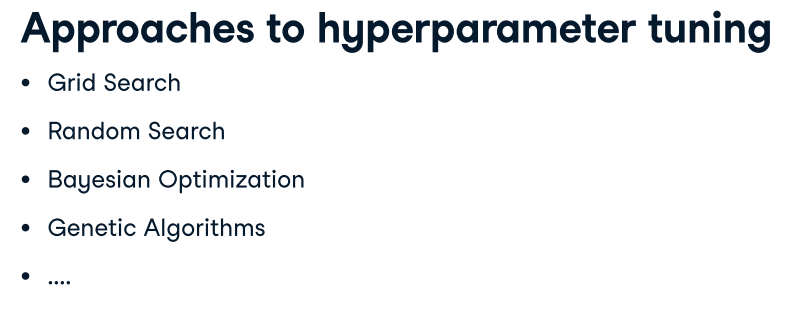

Now there are many approaches for hyperparameter tuning including: grid-search, random-search, and so on. In this course, we'll only be exploring the method of grid-search.

6. Grid search cross validation

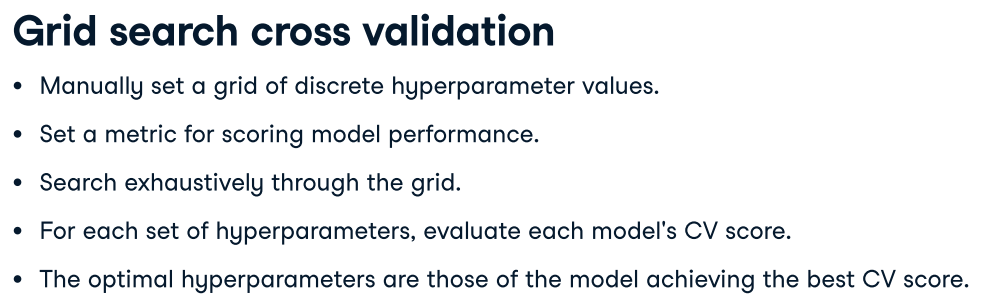

In grid-search cross-validation, first you manually set a grid of discrete hyperparameter values. Then, you pick a metric for scoring model performance and you search exhaustively through the grid. For each set of hyperparameters, you evaluate each model's score. The optimal hyperparameters are those for which the model achieves the best cross-validation score. Note that grid-search suffers from the curse of dimensionality, i-dot-e-dot, the bigger the grid, the longer it takes to find the solution.

7. Grid search cross validation: example

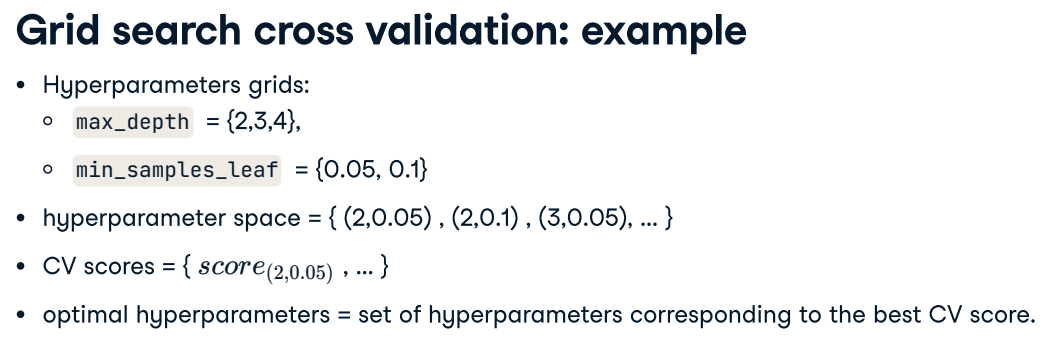

Let's walk through a concrete example to understand this procedure. Consider the case of a CART where you search through the two-dimensional hyperparameter grid shown here. The dimensions correspond to the CART's maximum-depth and the minimum-percentage of samples per leaf. For each combination of hyperparameters, the cross-validation score is evaluated using k-fold CV for example. Finally, the optimal hyperparameters correspond to the model achieving the best cross-validation score.

8. Inspecting the hyperparameters of a CART in sklearn

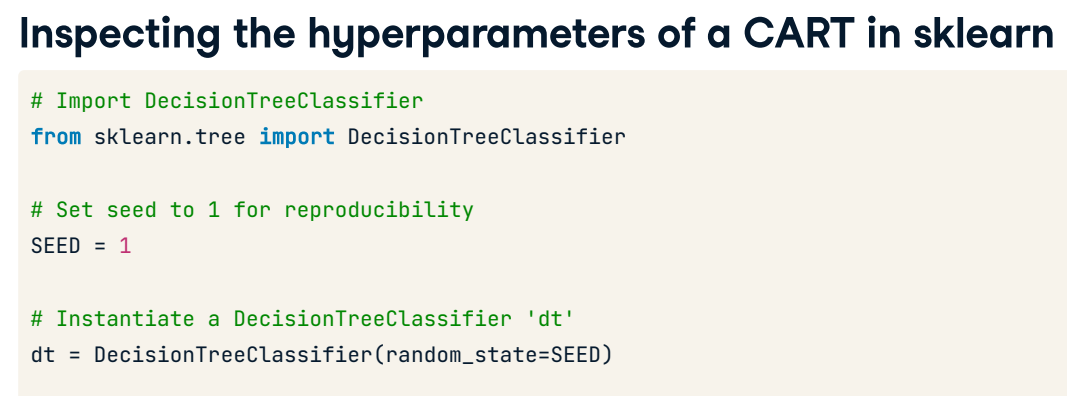

Let's now see how we can inspect the hyperparameters of a CART in scikit-learn. You can first instantiate a DecisionTreeClassifier dt as shown here.

9. Inspecting the hyperparameters of a CART in sklearn

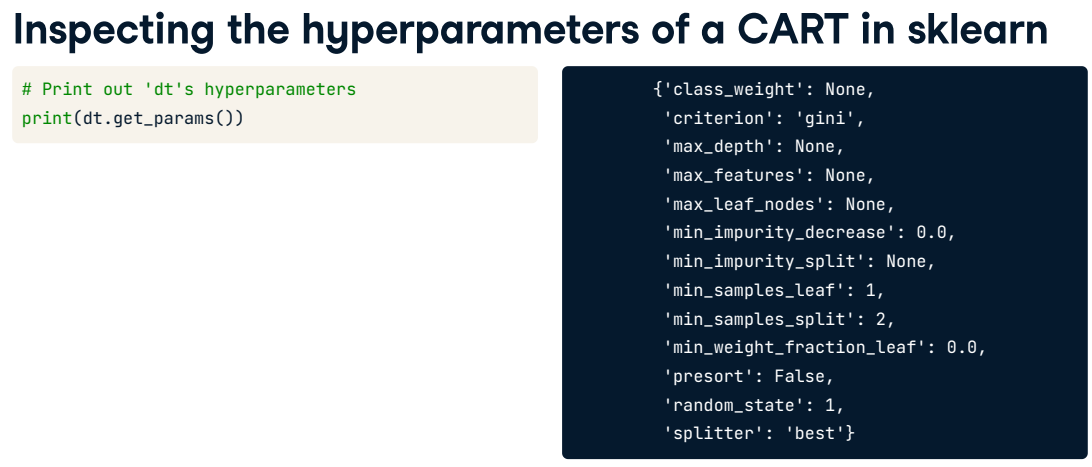

Then, call dt's -dot-get_params() method. This prints out a dictionary where the keys are the hyperparameter names. In the following, we'll only be optimizing max_depth, max_features and min_samples_leaf. Note that max_features is the number of features to consider when looking for the best split. When it's a float, it is interpreted as a percentage. You can learn more about these hyperparameters by consulting scikit-learn's documentation.

10. Grid search CV in sklearn (Breast Cancer dataset)

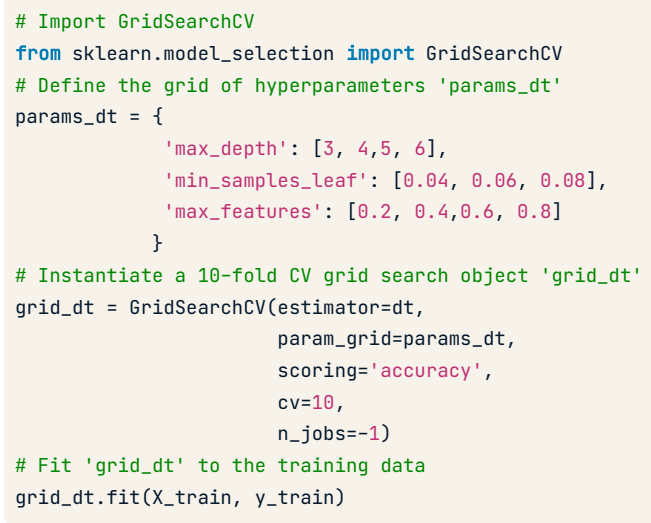

Let's now tune dt on the wisconsin breast cancer dataset which is already loaded and split into 80%-train and 20%-test. First, import GridSearchCV from sklearn-dot-model_selection. Then, define a dictionary called params_dt containing the names of the hyperparameters to tune as keys and lists of hyperparameter-values as values. Once done, instantiate a GridSearchCV object grid_dt by passing dt as an estimator and params_dt as param_grid. Also set scoring to accuracy and cv to 10 in order to use 10-fold stratified cross-validation for model evaluation. Finally, fit grid_dt to the training set.

11. Extracting the best hyperparameters

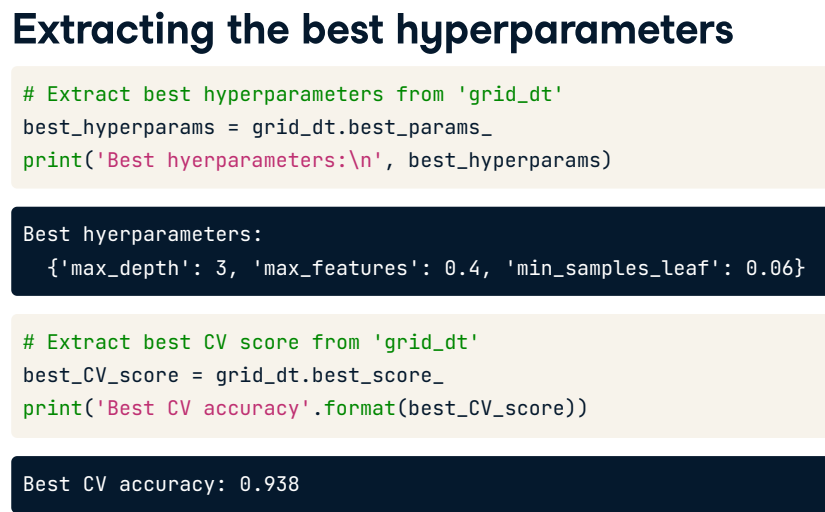

After training grid_dt, the best set of hyperparameter-values can be extracted from the attribute -dot-best_params_ of grid_dt. Also, the best cross validation accuracy can be accessed through grid_dt's -dot-best_score_ attribute.

12. Extracting the best estimator

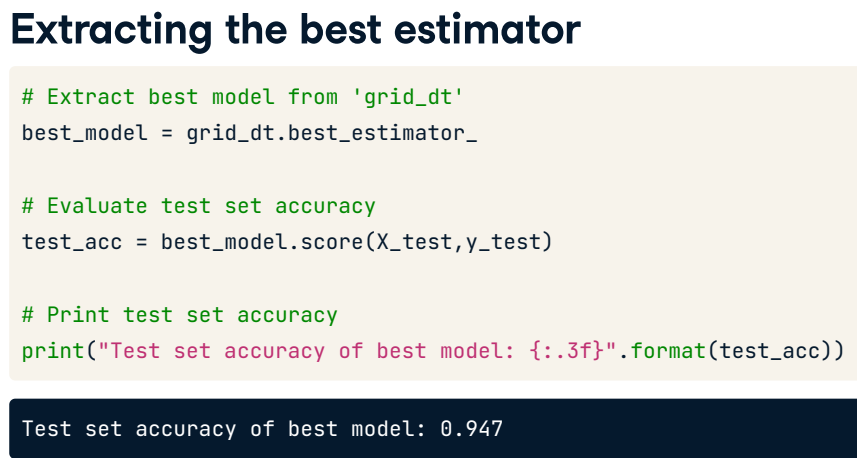

Similarly, the best-model can be extracted using the -dot-best_estimator attribute. Note that this model is fitted on the whole training set because the refit parameter of GridSearchCV is set to True by default. Finally, you can evaluate this model's test set accuracy using the score method. The result is about 94-dot-7% while the score of an untuned CART is of 93%.

13. Let's practice!

Now it's your turn to practice.

### Exercise

**Tree hyperparameters**

In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter.

Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

We have instantiated a DecisionTreeClassifier and assigned to dt with sklearn's default hyperparameters. You can inspect the hyperparameters of dt in your console.

Which of the following is not a hyperparameter of dt?

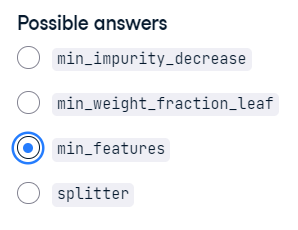

Well done! There is no hyperparameter named min_features.

### Exercise

**Set the tree's hyperparameter grid**

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

**Instructions**

- Define a grid of hyperparameters corresponding to a Python dictionary called params_dt with:
    - the key 'max_depth' set to a list of values 2, 3, and 4
    - the key 'min_samples_leaf' set to a list of values 0.12, 0.14, 0.16, 0.18

In [122]:
# Define params_dt
params_dt = {'max_depth' : [2,3,4],
             'min_samples_leaf' : [0.12, 0.14, 0.16, 0.18]}

Great! Next comes performing the grid search.

### Exercise

**Search for the optimal tree**

In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

    grid_object.fit(X_train, y_train)
    
An untuned classification tree dt as well as the dictionary params_dt that you defined in the previous exercise are available in your workspace.

**Instructions**

- Import GridSearchCV from sklearn.model_selection.
- Instantiate a GridSearchCV object using 5-fold CV by setting the parameters:
    - estimator to dt, param_grid to params_dt and
    - scoring to 'roc_auc'.

### Exercise

**Search for the optimal tree**

In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

    grid_object.fit(X_train, y_train)

An untuned classification tree dt as well as the dictionary params_dt that you defined in the previous exercise are available in your workspace.

**Instructions**

- Import GridSearchCV from sklearn.model_selection.
- Instantiate a GridSearchCV object using 5-fold CV by setting the parameters:
    - estimator to dt, param_grid to params_dt and
    - scoring to 'roc_auc'.

In [123]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

Awesome! As we said earlier, we will fit the model to the training data for you and in the next exercise you will compute the test set ROC AUC score.

### Exercise

**Evaluate the optimal tree**

In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the methodpredict_proba() of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. X_test, y_test are available in your workspace. In addition, we have also loaded the trained GridSearchCV object grid_dt that you instantiated in the previous exercise. Note that grid_dt was trained as follows:

    grid_dt.fit(X_train, y_train)

**Instructions**

- Import roc_auc_score from sklearn.metrics.
- Extract the .best_estimator_ attribute from grid_dt and assign it to best_model.
- Predict the test set probabilities of obtaining the positive class y_pred_proba.
- Compute the test set ROC AUC score test_roc_auc of best_model.

In [124]:
liver_preprocessed

Unnamed: 0   Age_std  Total_Bilirubin_std  Direct_Bilirubin_std  \
0             0  1.247403            -0.420320             -0.495414   
1             1  1.062306             1.218936              1.423518   
2             2  1.062306             0.640375              0.926017   
3             3  0.815511            -0.372106             -0.388807   
4             4  1.679294             0.093956              0.179766   
..          ...       ...                  ...                   ...   
574         578  0.938909            -0.452462             -0.495414   
575         579 -0.295067            -0.436391             -0.495414   
576         580  0.445318            -0.404249             -0.459878   
577         581 -0.850356            -0.323893             -0.353271   
578         582 -0.418465            -0.372106             -0.424343   

     Alkaline_Phosphotase_std  Alamine_Aminotransferase_std  \
0                   -0.428870                     -0.355832   
1                    1.675083                     -0.093573   
2                    0.816243                     -0.115428   
3                   -0.449416                     -0.366760   
4                   -0.395996                     -0.295731   
..                        ...                           ...   
574                  0.857336                     -0.333977   
575                 -0.794596                     -0.252021   
576                 -0.190532                     -0.180993   
577                 -0.441198                     -0.284804   
578                 -0.309701                     -0.328514   

     Aspartate_Aminotransferase_std  Total_Protiens_std  Albumin_std  \
0                         -0.319111            0.293722     0.203446   
1                         -0.035962            0.939655     0.077462   
2                         -0.146459            0.478274     0.203446   
3                         -0.312205            0.293722     0.329431   
4                         -0.177537            0.755102    -0.930414   
..                              ...                 ...          ...   
574                       -0.263863           -0.536763    -1.938290   
575                       -0.274222           -0.444487     0.077462   
576                       -0.212067           -0.075383     0.077462   
577                       -0.270769            0.293722     0.329431   
578                       -0.298393            0.755102     1.589276   

     Albumin_and_Globulin_Ratio_std  Is_male_std  Liver_disease  
0                         -0.147390            0              1  
1                         -0.648461            1              1  
2                         -0.178707            1              1  
3                          0.165780            1              1  
4                         -1.713237            1              1  
..                              ...          ...            ...  
574                       -1.807188            1              0  
575                        0.478949            1              1  
576                        0.165780            1              1  
577                        0.165780            1              1  
578                        1.731627            1              0  

[579 rows x 12 columns]

In [129]:
liver_preprocessed.drop('Unnamed: 0', axis=1, inplace=True)

In [130]:
liver_preprocessed.shape

(579, 11)

In [131]:
# Import the module
from sklearn.model_selection import train_test_split

X = liver_preprocessed.drop("Liver_disease", axis=1)
y = liver_preprocessed["Liver_disease"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [132]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

In [133]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.738


Great work! An untuned classification-tree would achieve a ROC AUC score of 0.54!

## 5 02 Tuning an RF's Hyperparameters

1. Tuning an RF's Hyperparameters

Let's now turn to a case where we tune the hyperparameters of Random Forests which is an ensemble method.

2. Random Forests Hyperparameters

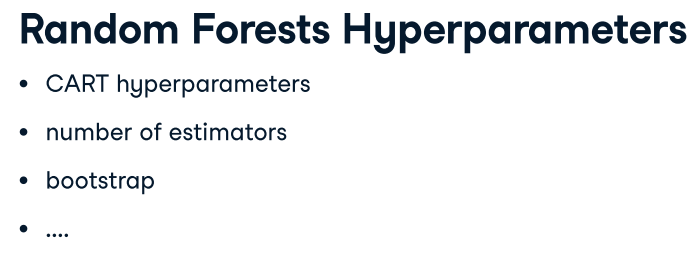

In addition to the hyperparameters of the CARTs forming random forests, the ensemble itself is characterized by other hyperparameters such as the number of estimators, whether it uses bootstraping or not and so on.

3. Tuning is expensive

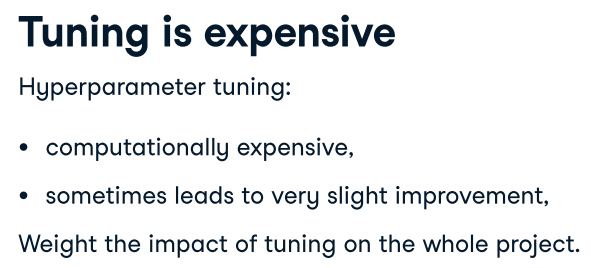

As a note, hyperparameter tuning is computationally expensive and may sometimes lead only to very slight improvement of a model's performance. For this reason, it is desired to weigh the impact of tuning on the pipeline of your data analysis project as a whole in order to understand if it is worth pursuing.

4. Inspecting RF Hyperparameters in sklearn

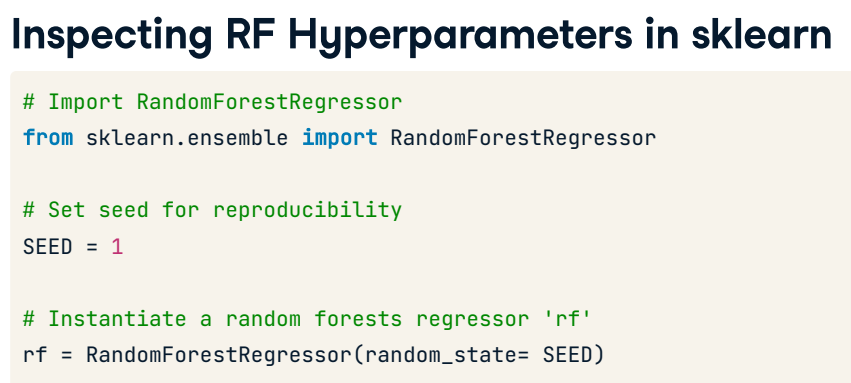

To inspect the hyperparameters of a RandomForestRegressor, first, import RandomForestRegressor from sklearn.ensemble and then instantiate a RandomForestRegressor rf as shown here.

5. Inspecting RF Hyperparameters in sklearn

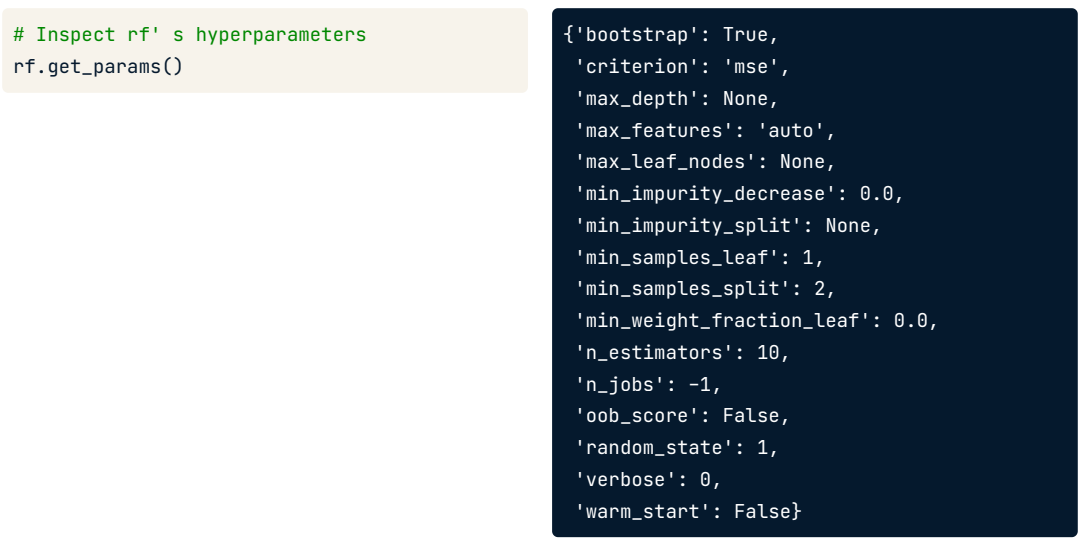

The hyperparameters of rf along with their default values can be accessed by calling rf's dot-get_params() method. In the following, we'll be optimizing n_estimators, max_depth, min_samples_leaf and max_features. You can learn more about these hyperparameters by consulting scikit-learn's documentation.

6. GridSearchCV in sklearn (auto dataset)

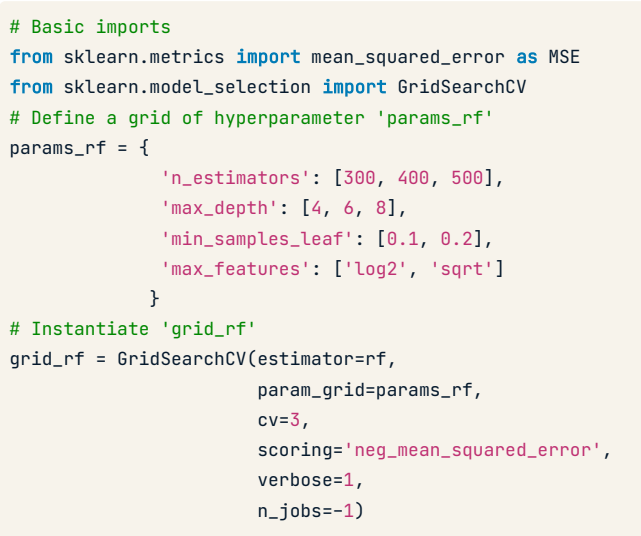

We'll perform grid-search cross-validation on the auto-dataset which is already loaded and split into 80%-train and 20%-test. First import mean_squared_error as MSE from sklearn.metrics and GridSearchCV from sklearn.model_selection. Then, define a dictionary called params_rf containing the grid of hyperparameters. Finally, instantiate a GridSearchCV object called grid_rf and pass the parameters rf as estimator, params_rf as param_grid. Also set cv to 3 to perform 3-fold cross-validation. In addition, set scoring to neg_mean_squared_error in order to use negative mean squared error as a metric. Note that the parameter verbose controls verbosity; the higher its value, the more messages are printed during fitting.

7. Searching for the best hyperparameters

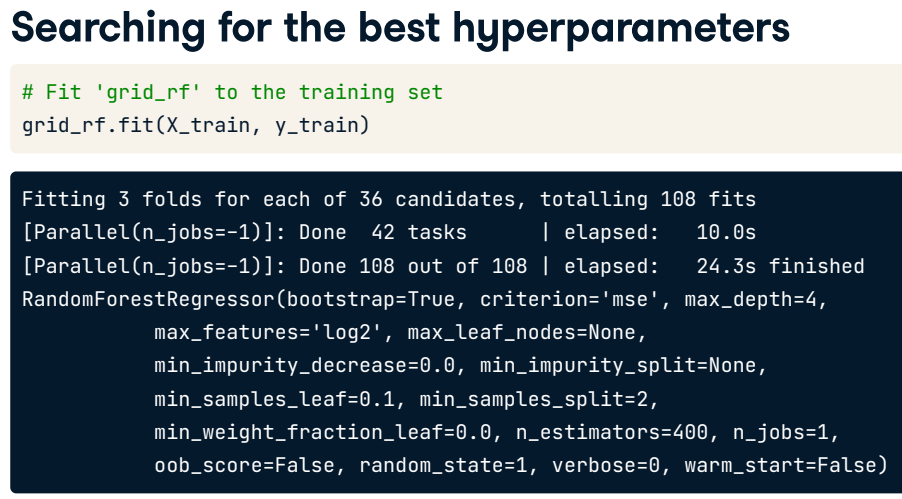

You can now fit grid_rf to the training set as shown here. The output shows messages related to grid fitting as well as the obtained optimal model.

8. Extracting the best hyperparameters

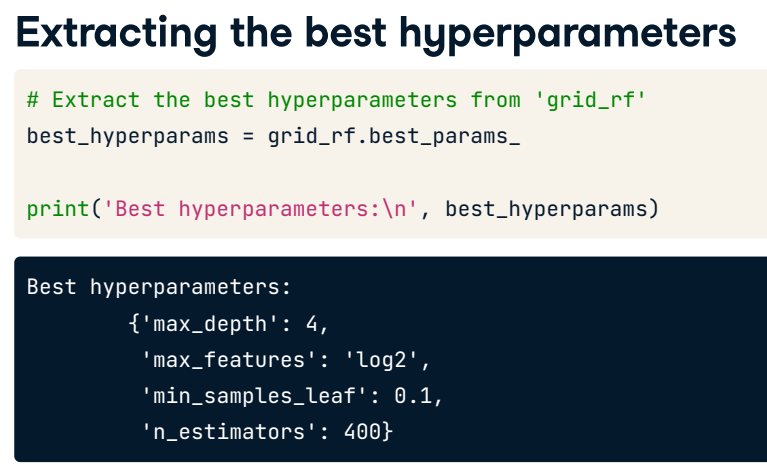

You can extract rf's best hyperparameters by getting the attribute best_params_ from grid_rf. The results are shown here.

9. Evaluating the best model performance

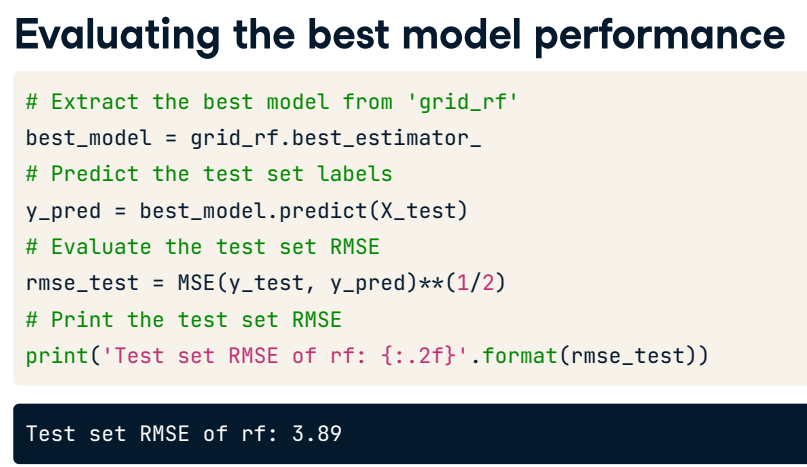

You can also extract the best model from rf. This enables you to predict the test set labels and evaluate the test-set RMSE. The output shows a result of 3-dot-89. If you would have trained an untuned model, the RMSE would be 3-dot-98.

10. Let's practice!

Now let's try some examples.

### Exercise

**Random forests hyperparameters**

In the following exercises, you'll be revisiting the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset that was introduced in a previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.

We have instantiated a RandomForestRegressor called rf using sklearn's default hyperparameters. You can inspect the hyperparameters of rf in your console.

Which of the following is not a hyperparameter of rf?

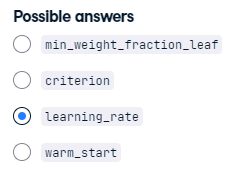

Well done! There is no hyperparameter named learning_rate.

### Exercise

**Set the hyperparameter grid of RF**

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

**Instructions**

- Define a grid of hyperparameters corresponding to a Python dictionary called params_rf with:
    - the key 'n_estimators' set to a list of values 100, 350, 500
    - the key 'max_features' set to a list of values 'log2', 'auto', 'sqrt'
    - the key 'min_samples_leaf' set to a list of values 2, 10, 30

In [134]:
bike

hr  holiday  workingday  temp   hum  windspeed  cnt  instant  mnth  yr  \
0      0        0           0  0.76  0.66     0.0000  149    13004     7   1   
1      1        0           0  0.74  0.70     0.1343   93    13005     7   1   
2      2        0           0  0.72  0.74     0.0896   90    13006     7   1   
3      3        0           0  0.72  0.84     0.1343   33    13007     7   1   
4      4        0           0  0.70  0.79     0.1940    4    13008     7   1   
...   ..      ...         ...   ...   ...        ...  ...      ...   ...  ..   
1483  19        0           1  0.80  0.49     0.1343  452    14487     8   1   
1484  20        0           1  0.80  0.49     0.1343  356    14488     8   1   
1485  21        0           1  0.76  0.58     0.1940  303    14489     8   1   
1486  22        0           1  0.76  0.58     0.1940  277    14490     8   1   
1487  23        0           1  0.74  0.62     0.1045  174    14491     8   1   

      Clear to partly cloudy  Light Precipitation  Misty  
0                          1                    0      0  
1                          1                    0      0  
2                          1                    0      0  
3                          1                    0      0  
4                          1                    0      0  
...                      ...                  ...    ...  
1483                       1                    0      0  
1484                       1                    0      0  
1485                       1                    0      0  
1486                       1                    0      0  
1487                       1                    0      0  

[1488 rows x 13 columns]

In [135]:
# Import the module
from sklearn.model_selection import train_test_split

X = bike.drop("cnt", axis=1)
y = bike["cnt"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [136]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 2

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)

In [138]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [139]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators': [100, 350, 500],
             'min_samples_leaf': [2, 10, 30],
             'max_features': ['log2', 'auto', 'sqrt']
            }

Great work! Time to perform the grid search.

### Exercise

**Search for the optimal forest**

In this exercise, you'll perform grid search using 3-fold cross validation to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

    grid_object.fit(X_train, y_train)

The untuned random forests regressor model rf as well as the dictionary params_rf that you defined in the previous exercise are available in your workspace.

**Instructions**

- Import GridSearchCV from sklearn.model_selection.
- Instantiate a GridSearchCV object using 3-fold CV by using negative mean squared error as the scoring metric.

In [140]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

Awesome! Next comes evaluating the test set RMSE of the best model.

### Exercise

**Evaluate the optimal forest**

In this last exercise of the course, you'll evaluate the test set RMSE of grid_rf's optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available X_test, y_test and the function mean_squared_error from sklearn.metrics under the alias MSE. In addition, we have also loaded the trained GridSearchCV object grid_rf that you instantiated in the previous exercise. Note that grid_rf was trained as follows:

    grid_rf.fit(X_train, y_train)

**Instructions**

- Import mean_squared_error as MSE from sklearn.metrics.
- Extract the best estimator from grid_rf and assign it to best_model.
- Predict best_model's test set labels and assign the result to y_pred.
- Compute best_model's test set RMSE.

In [141]:
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [142]:
# Extract the best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 350}


In [143]:
# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Test RMSE of best model: 54.236


Magnificent work!

## Congratulations!

Congratulations on completing this course!

1. How far you have come

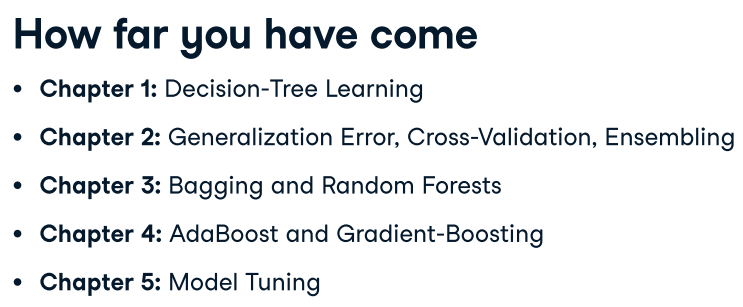

Take a moment to take a look at how far you have come! In chapter 1, you started off by understanding and applying the CART algorithm to train decision trees or CARTs for problems involving classification and regression. In chapter 2, you understood what the generalization error of a supervised learning model is. In addition, you also learned how underfitting and overfitting can be diagnosed with cross-validation. Furthermore, you learned how model ensembling can produce results that are more robust than individual decision trees. In chapter 3, you applied randomization through bootstrapping and constructed a diverse set of trees in an ensemble through bagging. You also explored how random forests introduces further randomization by sampling features at the level of each node in each tree forming the ensemble. Chapter 4 introduced you to boosting, an ensemble method in which predictors are trained sequentially and where each predictor tries to correct the errors made by its predecessor. Specifically, you saw how AdaBoost involved tweaking the weights of the training samples while gradient boosting involved fitting each tree using the residuals of its predecessor as labels. You also learned how subsampling instances and features can lead to a better performance through Stochastic Gradient Boosting. Finally, in chapter 5, you explored hyperparameter tuning through Grid Search cross-validation and you learned how important it is to get the most out of your models.

2. Thank you!

I hope you enjoyed taking this course as much as I enjoyed developing it. Finally, I encourage you to apply the skills you learned by practicing on real-world datasets.